# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reading our dataset

## This dataset addresses the lack of public botnet datasets, especially for the IoT. It suggests real traffic data, gathered from 9 commercial IoT devices authentically infected by Mirai and BASHLITE.



In [31]:
benign_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.benign.csv')

g_c_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.gafgyt.combo.csv')
g_j_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.gafgyt.junk.csv')
g_s_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.gafgyt.scan.csv')
g_t_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.gafgyt.tcp.csv')
g_u_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.gafgyt.udp.csv')
m_a_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.mirai.ack.csv')
m_sc_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.mirai.scan.csv')
m_sy_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.mirai.syn.csv')
m_u_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.mirai.udp.csv')
m_u_p_df = pd.read_csv('C:/Users/aa/Downloads/ai for cs/5.mirai.udpplain.csv')

In [32]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [33]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [34]:
df['type']

0                 benign
1                 benign
2                 benign
3                 benign
4                 benign
               ...      
828255    mirai_udpplain
828256    mirai_udpplain
828257    mirai_udpplain
828258    mirai_udpplain
828259    mirai_udpplain
Name: type, Length: 828260, dtype: object

## Defining Normal & Attacks

In [35]:
# Mapping dictionary
type_mapping = {
    'benign': ['benign'],
    'mirai attacks': ['mirai_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn', 'mirai_udpplain'],
    'gafgyt attacks': ['gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan', 'gafgyt_tcp', 'gafgyt_udp']
}

# Function to map types
def map_types(type_val):
    for new_type, old_types in type_mapping.items():
        if type_val in old_types:
            return new_type
    return 'Unknown'  

# Apply mapping to the 'type' column
df['type'] = df['type'].map(map_types)


In [36]:
df

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      590.000000            0.000000   
2               1.942585      590.000000            0.000000   
3               1.000000       60.000000            0.000000   
4               1.979600       66.061831           35.996177   
...                  ...             ...                 ...   
828255         87.531184      215.656970        52663.369508   
828256         88.530533      219.478736        53346.970597   
828257         89.031218      223.236084        53990.571728   
828258         90.030923      221.422973        53683.560352   
828259         91.030328      219.649685        53376.932506   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000        0.000000e+00   
1               1.000000      590.000000        0.000000e+00   
2               1.965145      590.000000        1.160000e-10   
3               1.000000       60.000000        0.000000e+00   
4               1.987709       66.037100        3.599862e+01   
...                  ...             ...                 ...   
828255        124.827316      255.099568        5.830603e+04   
828256        125.826759      257.475060        5.854704e+04   
828257        126.400478      259.820976        5.877397e+04   
828258        127.400227      258.252525        5.862359e+04   
828259        128.399722      256.708499        5.847074e+04   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      590.000000            0.000000   
2               1.988244      590.000000            0.000000   
3               1.000000       60.000000            0.000000   
4               1.995886       66.012367           35.999847   
...                  ...             ...                 ...   
828255        383.945706      306.000433        60984.181302   
828256        384.945135      306.644680        60985.116061   
828257        385.509931      307.286311        60985.221966   
828258        386.509677      306.646518        60985.240299   
828259        387.509166      306.010026        60984.446191   

        MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  HpHp_L0.1_pcc  \
0                 1.000000  ...                   0.0            0.0   
1                 1.000000  ...                   0.0            0.0   
2                 1.998818  ...                   0.0            0.0   
3                 1.000000  ...                   0.0            0.0   
4                 1.999588  ...                   0.0            0.0   
...                    ...  ...                   ...            ...   
828255         3470.002907  ...                   0.0            0.0   
828256         3471.002391  ...                   0.0            0.0   
828257         3471.609774  ...                   0.0            0.0   
828258         3472.609545  ...                   0.0            0.0   
828259         3473.609085  ...                   0.0            0.0   

        HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0                1.000000        60.000000        0.000000   
1                6.302352       416.121686      113.526005   
2                7.301607       439.935392      121.229684   
3                1.000000        60.000000        0.000000   
4                1.000000        72.000000        0.000000   
...                   ...              ...             ...   
828255           1.000000        60.000000        0.000000   
828256       13308.390626       554.000000        0.000047   
828257       13309.240083       554.000000        0.000047   
828258           1.000000        60.000000        0.000000   
828259           1.000000        60.000000        0.000000   

        HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0                

# EDA

In [37]:
df.shape

(828260, 116)

In [38]:
df["type"].value_counts()

mirai attacks     436010
gafgyt attacks    330096
benign             62154
Name: type, dtype: int64

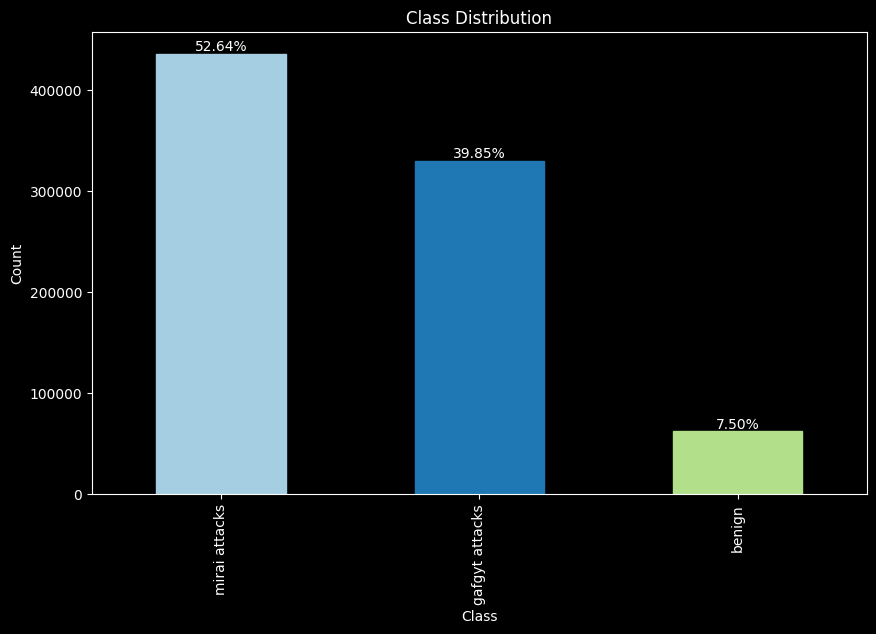

In [39]:
class_counts = df['type'].value_counts()

plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar')

colors = plt.cm.Paired(range(len(class_counts)))
for i, bar in enumerate(bars.patches):
    bar.set_color(colors[i])

# Adding percentages on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3,
             f'{bar.get_height() / len(df) * 100:.2f}%', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()


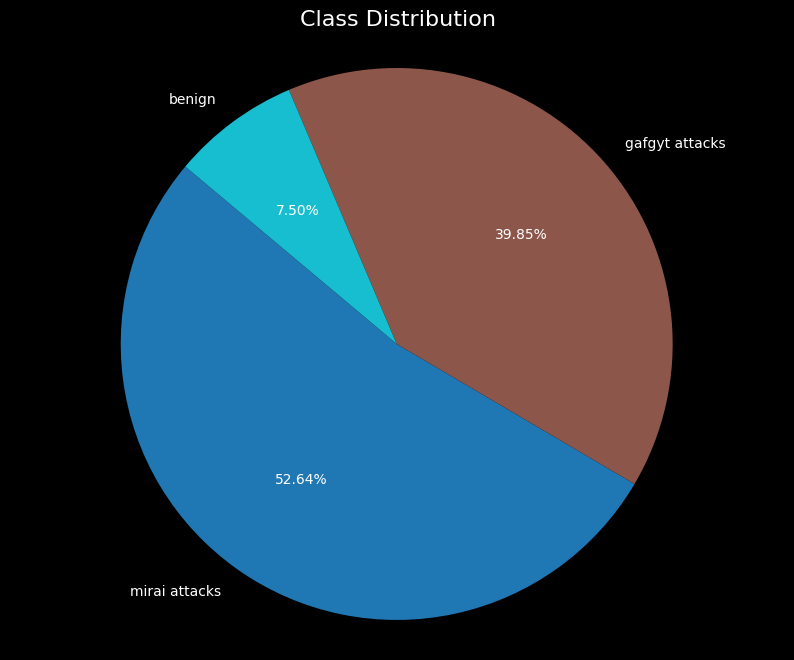

In [40]:
class_counts = df['type'].value_counts()

num_slices = len(class_counts)
color_palette = plt.cm.get_cmap('tab10', num_slices)  
colors = color_palette(range(num_slices))

plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Class Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## from this class distribution we foud that the types [mirai attacks , gafgyt attacks , benign] are unbalanced so we will use undersampling technique to make our df almost balanced

In [41]:
import pandas as pd


mirai_rows = df[df['type'] == 'mirai attacks']
gafgyt_rows = df[df['type'] == 'gafgyt attacks']

# Check if there are fewer than 70,000 rows for 'mirai' and 'gafgyt'
if len(mirai_rows) < 70000 or len(gafgyt_rows) < 70000:
    print("There are not enough rows for sampling.")
    # Handle the situation accordingly (select all available rows or adjust the sampling size)

else:
    # Randomly sample 70,000 rows for 'mirai' and 'gafgyt'
    mirai_subset = mirai_rows.sample(n=70000, random_state=42)
    gafgyt_subset = gafgyt_rows.sample(n=70000, random_state=42)

    # Concatenate the subsets together
    new_df = pd.concat([mirai_subset, gafgyt_subset, df[df['type'] == 'benign']])

    # Optional: Reset the index of the new dataframe
    new_df.reset_index(drop=True, inplace=True)


In [42]:
new_df

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0             106.084975      218.884657        55151.172358   
1              10.387114       60.029820            0.625700   
2              95.221813      240.111782        56489.576295   
3              31.289417       65.051669           45.187290   
4             197.242911      371.677753        56798.457221   
...                  ...             ...                 ...   
202149          1.196418       64.089727          105.965953   
202150          1.037652       60.148397            4.429889   
202151          1.000000      179.000000            0.000000   
202152          1.000020       60.002343            0.278781   
202153          1.031027       60.000070            0.008390   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0             139.715058      220.503962        5.545173e+04   
1              26.176970       60.078582        1.581998e+00   
2             143.289242      275.193521        5.995924e+04   
3              48.440442       65.599107        4.696062e+01   
4             279.452484      359.251229        5.824457e+04   
...                  ...             ...                 ...   
202149          1.682884       69.319431        1.927311e+02   
202150          1.211249       61.625361        4.611903e+01   
202151          1.000000      179.000000        2.180000e-11   
202152          1.001501       60.178405        2.119838e+01   
202153          1.124650       60.019773        2.352656e+00   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0             378.677607      281.982352        63032.093802   
1             147.787846       60.117573            2.103540   
2             383.983618      319.294505        60832.316454   
3             184.775357       67.037422           48.911445   
4             587.000564      350.363578        59092.043350   
...                  ...             ...                 ...   
202149          3.879852       72.983948          220.472233   
202150          2.942653       68.571620          183.370073   
202151          1.000033      178.996352            0.408854   
202152          1.114512       72.226453         1305.459125   
202153          1.556458       64.371147          501.058604   

        MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  HpHp_L0.1_pcc  \
0              3425.001497  ...                   0.0            0.0   
1              1930.226956  ...                   0.0            0.0   
2              3825.562379  ...                   0.0            0.0   
3              2765.823953  ...                   0.0            0.0   
4              4034.286267  ...                   0.0            0.0   
...                    ...  ...                   ...            ...   
202149            8.987380  ...                   0.0            0.0   
202150            9.386700  ...                   0.0            0.0   
202151            4.002855  ...                   0.0            0.0   
202152            4.222950  ...                   0.0            0.0   
202153            4.939587  ...                   0.0            0.0   

        HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0                1.000000            566.0    0.000000e+00   
1                1.000000             60.0    0.000000e+00   
2                1.000000             60.0    0.000000e+00   
3                1.000000             60.0    0.000000e+00   
4                1.000000            554.0    0.000000e+00   
...                   ...              ...             ...   
202149           7.156529             60.0    0.000000e+00   
202150           8.107195             60.0    6.740000e-07   
202151           1.000000            179.0    0.000000e+00   
202152           8.078825             60.0    0.000000e+00   
202153           9.022905             60.0    0.000000e+00   

        HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0                

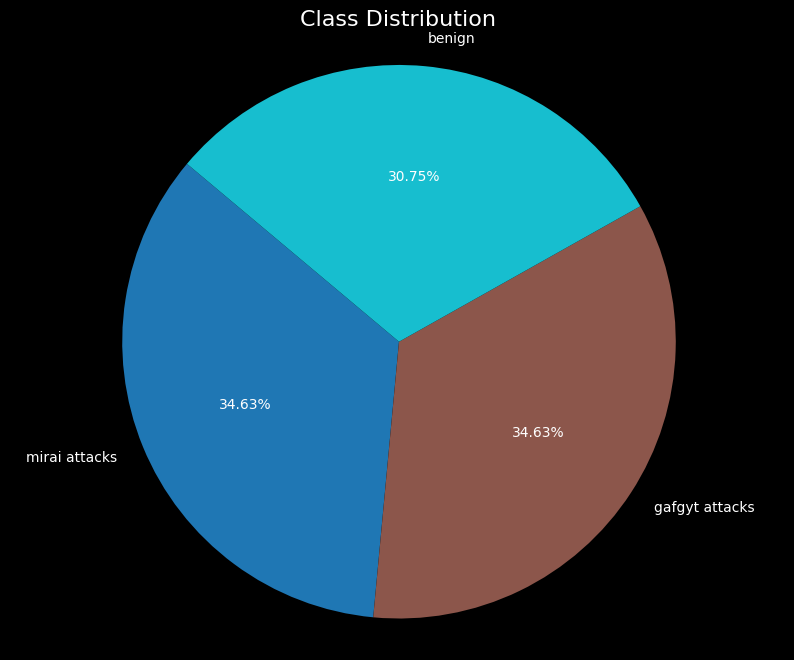

In [43]:
class_counts = new_df['type'].value_counts()

num_slices = len(class_counts)
color_palette = plt.cm.get_cmap('tab10', num_slices)  
colors = color_palette(range(num_slices))

plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Class Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202154 entries, 0 to 202153
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 178.9+ MB


In [45]:
new_df.isnull().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_magnitude     0
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
type                     0
Length: 116, dtype: int64

In [46]:
new_df.head(10)

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0        106.084975      218.884657        55151.172358        139.715058   
1         10.387114       60.029820            0.625700         26.176970   
2         95.221813      240.111782        56489.576295        143.289242   
3         31.289417       65.051669           45.187290         48.440442   
4        197.242911      371.677753        56798.457221        279.452484   
5        181.019263      297.127037        63728.538545        252.141875   
6         82.826746      461.563415        37010.270925        116.725862   
7        114.048771      250.388265        57733.148672        181.000162   
8        124.522255      287.048671        60598.945362        188.824238   
9         79.595774       60.008665            0.132917        106.228726   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0      220.503962        55451.731221        378.677607      281.982352   
1       60.078582            1.581998        147.787846       60.117573   
2      275.193521        59959.238063        383.983618      319.294505   
3       65.599107           46.960622        184.775357       67.037422   
4      359.251229        58244.570894        587.000564      350.363578   
5      306.581017        63938.639546        493.300816      314.350945   
6      435.440162        44415.516492        337.571916      350.924318   
7      286.607837        60540.704685        515.488579      327.648476   
8      279.298910        60225.348243        427.720234      289.831775   
9       60.031780            0.513681        248.223044       60.079377   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
0        63032.093802         3425.001497  ...                   0.0   
1            2.103540         1930.226956  ...                   0.0   
2        60832.316454         3825.562379  ...                   0.0   
3           48.911445         2765.823953  ...                   0.0   
4        59092.043350         4034.286267  ...                   0.0   
5        63980.683710         3339.114990  ...                   0.0   
6        59014.855653         3042.666438  ...                   0.0   
7        60553.303834         4248.347329  ...                   0.0   
8        60694.434534         3458.254539  ...                   0.0   
9            1.341173         2026.353338  ...                   0.0   

   HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0            0.0            1.00000            566.0        0.000000   
1            0.0            1.00000             60.0        0.000000   
2            0.0            1.00000             60.0        0.000000   
3            0.0            1.00000             60.0        0.000000   
4            0.0            1.00000            554.0        0.000000   
5            0.0            1.00000            566.0        0.000000   
6            0.0            1.00000             60.0        0.000000   
7            0.0            1.00000             60.0        0.000000   
8            0.0         7568.51939            554.0        0.000072   
9            0.0            1.00000             60.0        0.000000   

   HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0                 566.0       0.000000e+00                    0.0   
1                  60.0       0.000000e+00                    0.0   
2                  60.0       0.000000e+00                    0.0   
3                  60.0       0.000000e+00                    0.0   
4                 554.0       0.000000e+00                    0.0   
5                 566.0       0.000000e+00                    0.0   
6                  60.0       0.000000e+00                    0.0   
7                  60.0       0.000000e+00                    0.0   
8                 554.0       5.238689e-09                    0.0   
9                  60.0       0.000000e+00           

In [47]:
#how many instances of each class
new_df.groupby('type')['type'].count()

type
benign            62154
gafgyt attacks    70000
mirai attacks     70000
Name: type, dtype: int64

## Scatter plot for the three types to see anomalies

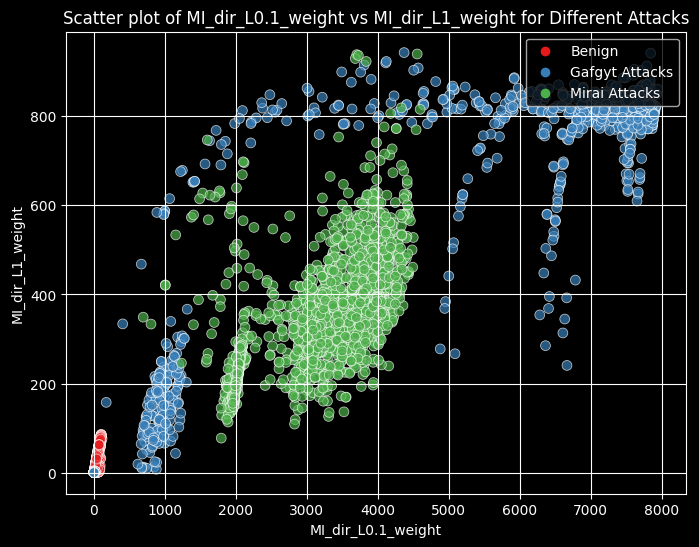

In [48]:
# Select samples for each type
benign_subset = new_df[new_df['type'] == 'benign'].sample(n=2000, random_state=1)
gafgyt_subset = new_df[new_df['type'] == 'gafgyt attacks'].sample(n=2000, random_state=1)
mirai_subset = new_df[new_df['type'] == 'mirai attacks'].sample(n=2000, random_state=1)

# Concatenate the subsets into a single DataFrame with a 'type' column
subset_df = pd.concat([benign_subset.assign(Type='Benign'),
                       gafgyt_subset.assign(Type='Gafgyt Attacks'),
                       mirai_subset.assign(Type='Mirai Attacks')])

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='MI_dir_L0.1_weight', y='MI_dir_L1_weight', hue='Type', palette='Set1', alpha=0.7, s=50)
plt.title('Scatter plot of MI_dir_L0.1_weight vs MI_dir_L1_weight for Different Attacks')
plt.xlabel('MI_dir_L0.1_weight')
plt.ylabel('MI_dir_L1_weight')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Scatter plot in 3D

In [49]:
import plotly.express as px

# Concatenate the subsets into a single DataFrame with a 'type' column
subset_df = pd.concat([benign_subset.assign(Type='Benign'),
                       gafgyt_subset.assign(Type='Gafgyt Attacks'),
                       mirai_subset.assign(Type='Mirai Attacks')])

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(subset_df, x='MI_dir_L0.1_weight', y='MI_dir_L1_weight', z='H_L1_weight', color='Type', 
                    symbol='Type', opacity=0.7, size_max=10)

fig.update_layout(scene=dict(xaxis=dict(title='MI_dir_L0.1_weight'),
                             yaxis=dict(title='MI_dir_L1_weight'),
                             zaxis=dict(title='H_L1_weight')),
                  legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01),
                  margin=dict(l=0, r=0, b=0, t=0))

fig.update_traces(marker=dict(size=5))

fig.show()


## Features distribution

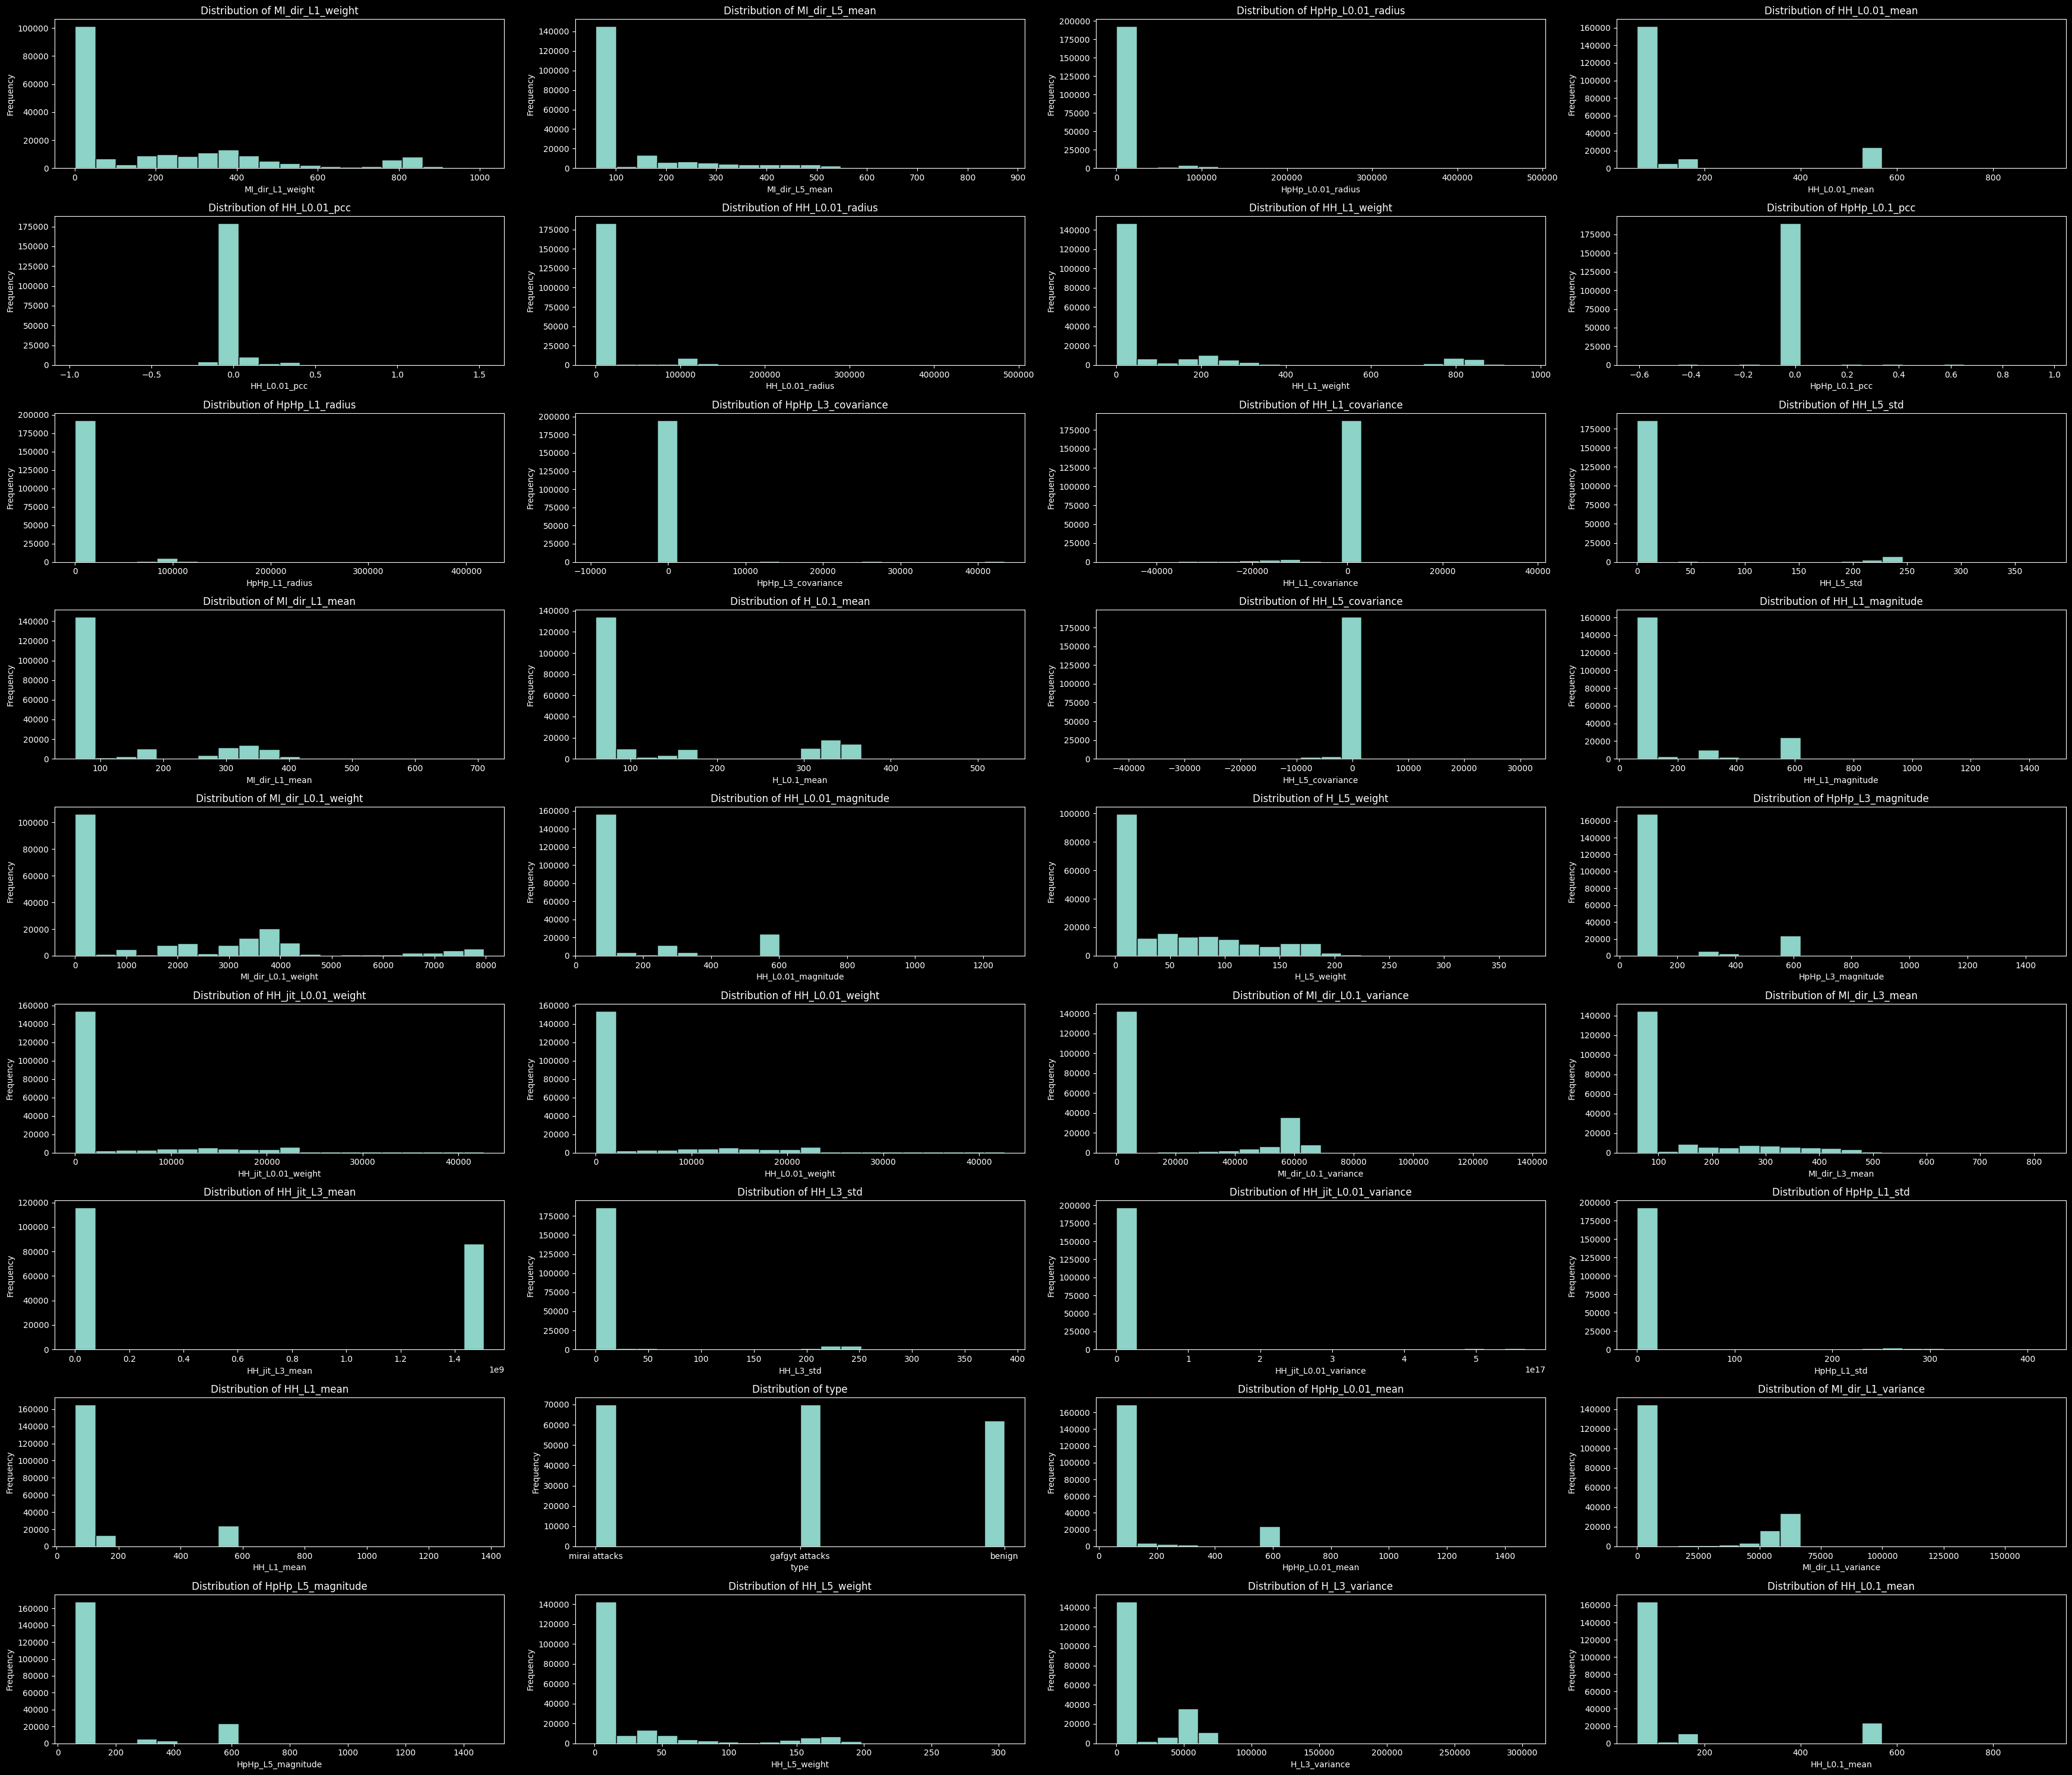

In [50]:
sampled_features = new_df.sample(n=36, axis=1)  
num_cols = 4  
num_rows = len(sampled_features.columns) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 30))

# Plotting histograms for the sampled features
for i, col in enumerate(sampled_features.columns):
    row = i // num_cols
    col_idx = i % num_cols
    ax = axes[row, col_idx] if num_rows > 1 else axes[col_idx]
    
    ax.hist(sampled_features[col], bins=20, edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

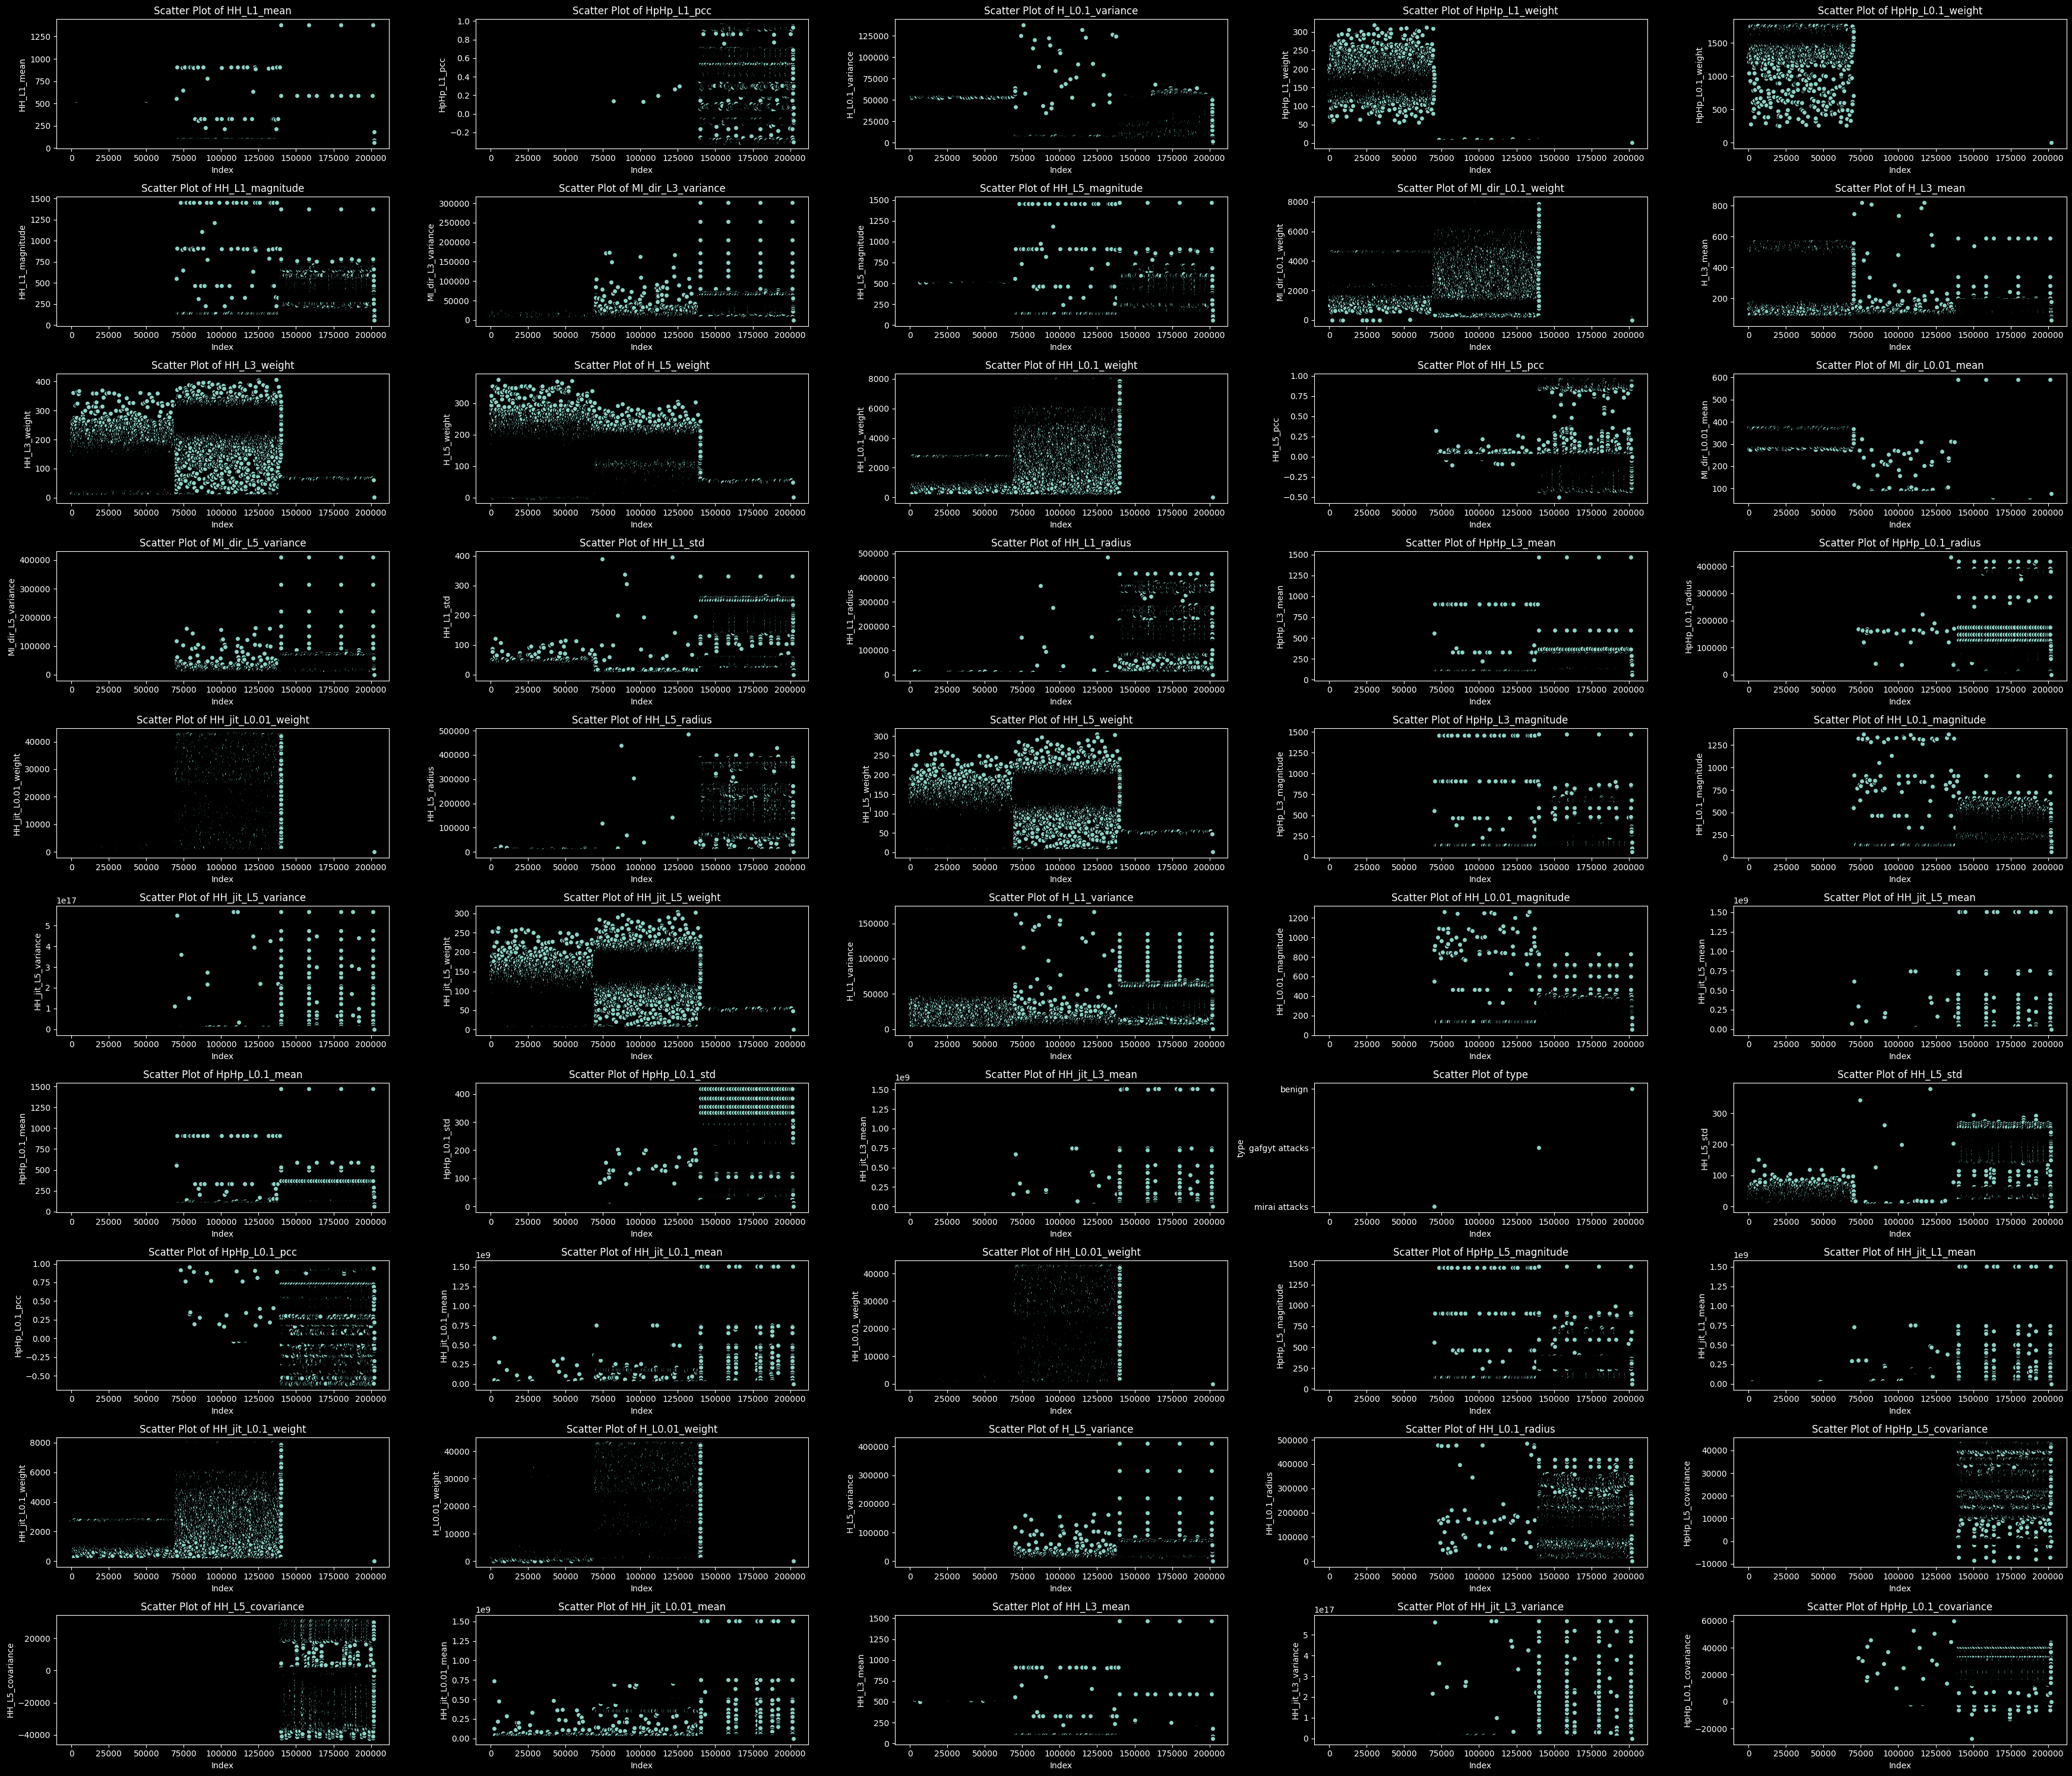

In [51]:
sampled_features = new_df.sample(n=50, axis=1)  
num_cols = 5  
num_rows = len(sampled_features.columns) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 30))

# Plotting scatter plots for the sampled features
for i, col in enumerate(sampled_features.columns):
    row = i // num_cols
    col_idx = i % num_cols
    ax = axes[row, col_idx] if num_rows > 1 else axes[col_idx]
    
    ax.scatter(sampled_features.index, sampled_features[col], edgecolor='black')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.set_title(f'Scatter Plot of {col}')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [52]:
new_df.columns

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'HpHp_L0.01_weight',
       'HpHp_L0.01_mean', 'HpHp_L0.01_std', 'HpHp_L0.01_magnitude',
       'HpHp_L0.01_radius', 'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc', 'type'],
      dtype='object', length=116)

## Features Correlation

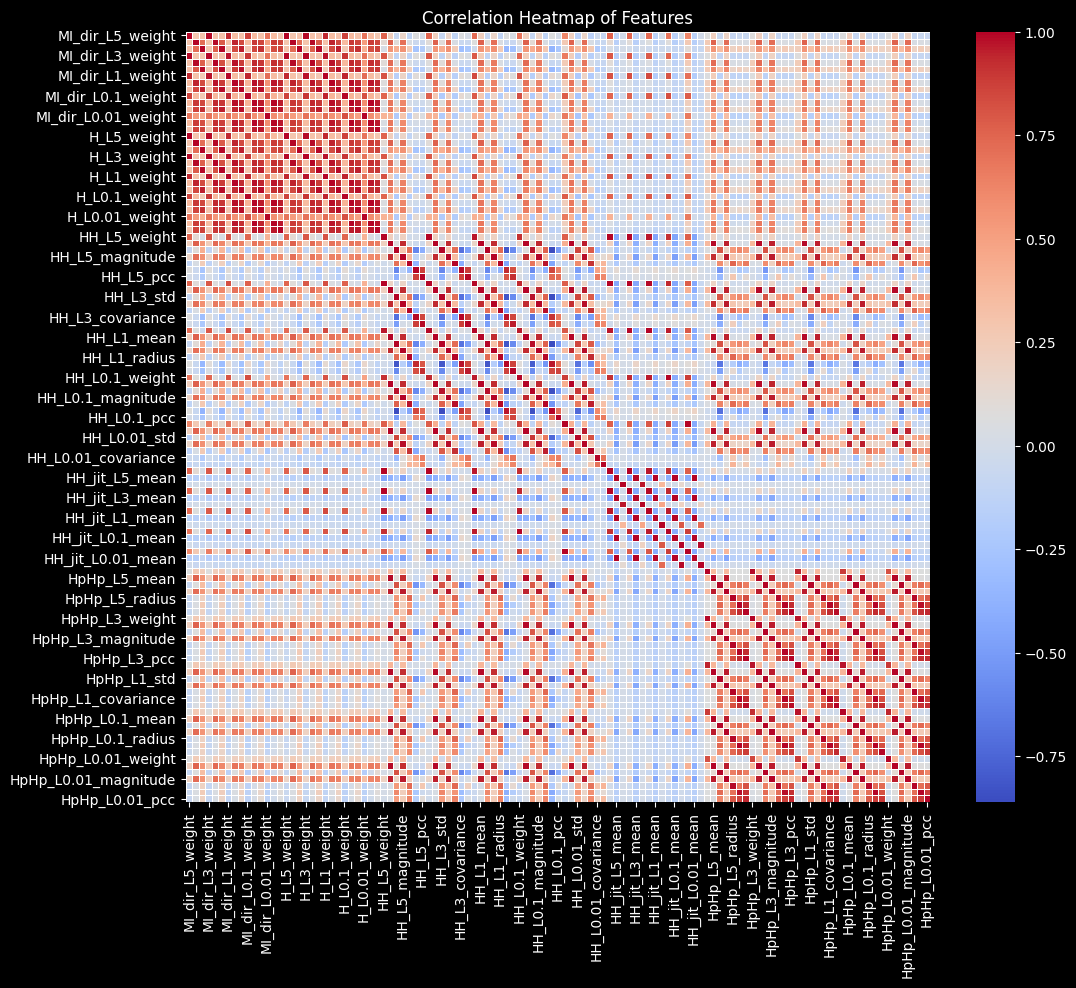

In [53]:
target_variable = 'type'
features = new_df.drop(target_variable, axis=1)

# Compute the correlation matrix
correlation_matrix = features.corr()

# Plotting the correlation heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Encoding and Feature selection 

## Encoding our three types

In [54]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'type' column
new_df['type'] = label_encoder.fit_transform(new_df['type'])

# Check the mapping of encoded values
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded mapping:", encoded_mapping)

Encoded mapping: {'benign': 0, 'gafgyt attacks': 1, 'mirai attacks': 2}


## Now We will apply feature selection using extra tree classifier

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = new_df.drop('type', axis=1)  
y = new_df['type']  



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X
X = scaler.fit_transform(X)


# Splitting the data into train (50%) and rest (50%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Splitting the rest into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [56]:
after_scaling = pd.DataFrame(X)
after_scaling

0             1             2         3         4    \
0       2.817849e-01  1.953173e-01  1.343260e-01  0.251439  0.210646   
1       2.517150e-02  3.665758e-05  1.523954e-06  0.045636  0.000103   
2       2.526553e-01  2.214118e-01  1.375859e-01  0.257918  0.282421   
3       8.122093e-02  6.210029e-03  1.100580e-04  0.085992  0.007348   
4       5.262244e-01  3.831462e-01  1.383382e-01  0.504731  0.392739   
...              ...           ...           ...       ...       ...   
202149  5.266930e-04  5.027512e-03  2.580904e-04  0.001238  0.012231   
202150  1.009623e-04  1.824248e-04  1.078943e-05  0.000383  0.002133   
202151  0.000000e+00  1.462870e-01  0.000000e+00  0.000000  0.156176   
202152  5.279060e-08  2.879936e-06  6.789984e-07  0.000003  0.000234   
202153  8.319992e-05  8.666582e-08  2.043397e-08  0.000226  0.000026   

                 5             6         7         8         9    ...  \
0       1.835530e-01  3.742910e-01  0.341656  0.378276  0.430077  ...   
1       5.236637e-06  1.454716e-01  0.000181  0.000013  0.242323  ...   
2       1.984735e-01  3.795495e-01  0.399083  0.365074  0.480390  ...   
3       1.554463e-04  1.821275e-01  0.010831  0.000294  0.347280  ...   
4       1.927977e-01  5.807460e-01  0.446902  0.354630  0.506607  ...   
...              ...           ...       ...       ...       ...  ...   
202149  6.379669e-04  2.854029e-03  0.019984  0.001323  0.001003  ...   
202150  1.526605e-04  1.925233e-03  0.013193  0.001100  0.001053  ...   
202151  7.216107e-17  3.273680e-08  0.183149  0.000002  0.000377  ...   
202152  7.016961e-05  1.134854e-04  0.018818  0.007834  0.000405  ...   
202153  7.787622e-06  5.514682e-04  0.006728  0.003007  0.000495  ...   

                 105       106       107       108           109  \
0       0.000000e+00  0.312732  0.386893  0.000000  3.588652e-01   
1       0.000000e+00  0.312732  0.386893  0.000000  2.081668e-17   
2       0.000000e+00  0.312732  0.386893  0.000000  2.081668e-17   
3       0.000000e+00  0.312732  0.386893  0.000000  2.081668e-17   
4       0.000000e+00  0.312732  0.386893  0.000000  3.503546e-01   
...              ...       ...       ...       ...           ...   
202149  1.048265e-18  0.312732  0.386893  0.000462  2.081668e-17   
202150  1.048265e-18  0.312732  0.386893  0.000534  2.081668e-17   
202151  0.000000e+00  0.312732  0.386893  0.000000  8.439716e-02   
202152  0.000000e+00  0.312732  0.386893  0.000531  2.081668e-17   
202153  0.000000e+00  0.312732  0.386893  0.000602  2.081668e-17   

                 110           111           112       113       114  
0       0.000000e+00  3.588652e-01  0.000000e+00  0.219425  0.387447  
1       0.000000e+00  2.081668e-17  0.000000e+00  0.219425  0.387447  
2       0.000000e+00  2.081668e-17  0.000000e+00  0.219425  0.387447  
3       0.000000e+00  2.081668e-17  0.000000e+00  0.219425  0.387447  
4       0.000000e+00  3.503546e-01  0.000000e+00  0.219425  0.387447  
...              ...           ...           ...       ...       ...  
202149  0.000000e+00  2.081668e-17  0.000000e+00  0.219425  0.387447  
202150  1.613660e-09  2.081668e-17  9.491645e-19  0.219425  0.387447  
202151  0.000000e+00  8.439716e-02  0.000000e+00  0.219425  0.387447  
202152  0.000000e+00  2.081668e-17  0.000000e+00  0.219425  0.387447  
202153  0.000000e+00  2.081668e-17  0.000000e+00  0.219425  0.387447  

[202154 rows x 115 columns]

## Applying feature selection using ExtraTree Classifiers to test the importance of each feature

Top 52 features and their importances:
Feature: 78 Importance: 0.07100726054892588
Feature: 69 Importance: 0.0596777994794481
Feature: 75 Importance: 0.054603422354023566
Feature: 72 Importance: 0.05297128714319476
Feature: 12 Importance: 0.051145015724856184
Feature: 9 Importance: 0.04405160340488116
Feature: 27 Importance: 0.03866500658774333
Feature: 66 Importance: 0.03567870032713973
Feature: 13 Importance: 0.03255549332700052
Feature: 24 Importance: 0.03234830668946794
Feature: 6 Importance: 0.031956201571073845
Feature: 15 Importance: 0.02932320561019523
Feature: 28 Importance: 0.02918176142556549
Feature: 21 Importance: 0.02815301959463476
Feature: 10 Importance: 0.02257671054281897
Feature: 0 Importance: 0.020055332069140737
Feature: 71 Importance: 0.018761966427389504
Feature: 25 Importance: 0.017288631744028185
Feature: 18 Importance: 0.016240145581789288
Feature: 22 Importance: 0.015032578732439343
Feature: 44 Importance: 0.014294856728243778
Feature: 4 Importance: 0.0136665

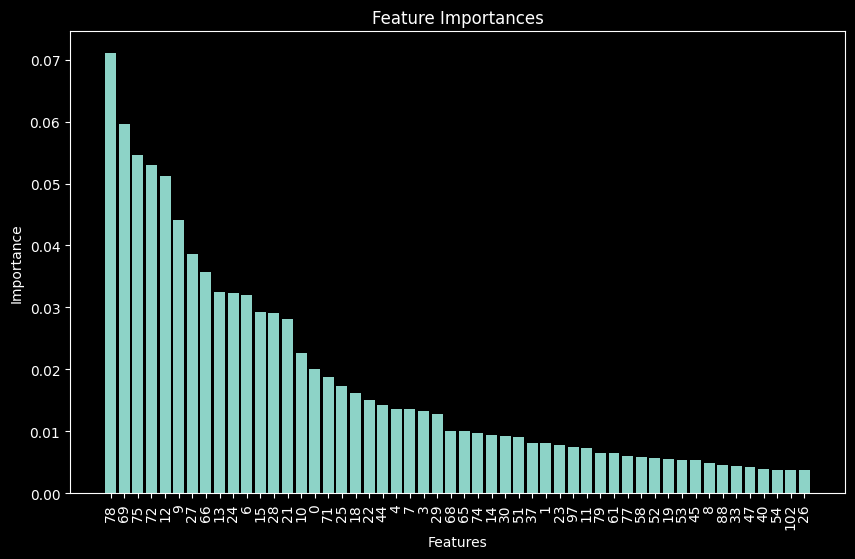

In [57]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Initialize the ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Fit the model to your training data
clf.fit(X_train_df, y_train)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top k features
k = 52 
top_k_features = X_train_df.columns[indices][:k]

# Print the top k features and their importances
print("Top", k, "features and their importances:")
for i in range(k):
    feature_name = top_k_features[i]
    print("Feature:", feature_name, "Importance:", importances[indices[i]])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(k), importances[indices][:k])
plt.xticks(range(k), top_k_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [58]:
top_k_features

Int64Index([ 78,  69,  75,  72,  12,   9,  27,  66,  13,  24,   6,  15,  28,
             21,  10,   0,  71,  25,  18,  22,  44,   4,   7,   3,  29,  68,
             65,  74,  14,  30,  51,  37,   1,  23,  97,  11,  79,  61,  77,
             58,  52,  19,  53,  45,   8,  88,  33,  47,  40,  54, 102,  26],
           dtype='int64')

### NOW This new_df only contain the best 50 featuers that have the highest importance

In [59]:

feature_indices = [115, 78, 75, 66, 12, 9, 24, 28, 69, 27, 72, 6, 13, 21, 3,
                   29, 25, 22, 10, 15, 7, 44, 37, 51, 71, 14, 11, 18, 1,
                   74, 0, 26, 61, 31, 4, 68, 47, 88, 65, 5, 23, 58, 55,
                   39, 79, 30, 45, 17, 46, 77, 59, 104]

# Select columns using the provided feature indices
selected_features = new_df.iloc[:, feature_indices]


In [60]:
selected_features

type  HH_jit_L0.01_mean  HH_jit_L0.1_mean  HH_jit_L5_mean  \
0          2       1.550931e+04      1.579411e-02    1.240247e-02   
1          2       1.507653e+09      1.507653e+09    1.507653e+09   
2          2       1.507656e+09      1.507656e+09    1.507656e+09   
3          2       1.507657e+09      1.507657e+09    1.507657e+09   
4          2       1.394921e+05      1.573855e+04    2.570742e-03   
...      ...                ...               ...             ...   
202149     0       3.482227e+01      3.227847e+01    1.001754e+00   
202150     0       3.065012e+01      2.612045e+01    9.980928e-01   
202151     0       1.834399e+03      1.834387e+03    1.834387e+03   
202152     0       1.829372e+03      1.829388e+03    1.829388e+03   
202153     0       9.120204e+02      8.834587e+02    5.602392e+01   

        MI_dir_L0.01_weight  MI_dir_L0.1_weight  H_L0.1_weight  H_L0.01_mean  \
0              28494.143724         3425.001497    3425.001497    330.017367   
1              12096.466356         1930.226956    1930.226956     60.105154   
2              37818.821882         3825.562379    3825.562379    340.721885   
3              10723.444335         2765.823953    2765.823953     67.024060   
4              12881.735784         4034.286267    4034.286267    345.617366   
...                     ...                 ...            ...           ...   
202149            30.134480            8.987380       8.987380     74.422833   
202150            30.926746            9.386700       9.386700     73.956479   
202151            28.595380            4.002855       4.002855     77.629922   
202152            28.982354            4.222950       4.222950     77.021624   
202153            29.781746            4.939587       4.939587     76.450078   

        HH_jit_L3_mean  H_L0.01_weight  ...  HH_L0.1_radius  HH_L3_std  \
0         1.406486e-02    28494.143724  ...    1.329913e+02   0.000015   
1         1.507653e+09    12096.466356  ...    0.000000e+00   0.000000   
2         1.507656e+09    37818.821882  ...    0.000000e+00   0.000000   
3         1.507657e+09    10723.444335  ...    0.000000e+00   0.000000   
4         3.046856e-03    12881.735784  ...    1.678935e+02  35.639140   
...                ...             ...  ...             ...        ...   
202149    1.039982e+00       30.134480  ...    4.550000e-13   0.000000   
202150    1.003241e+00       30.926746  ...    4.550000e-13   0.000000   
202151    1.834387e+03       28.595380  ...    0.000000e+00   0.000000   
202152    1.829388e+03       28.982354  ...    0.000000e+00   0.000000   
202153    2.033808e+02       29.781746  ...    4.550000e-13   0.000000   

        HH_jit_L0.01_variance  HH_L5_weight  HH_L1_mean  H_L5_variance  \
0                2.338248e+13     33.310764  565.999998   55151.172358   
1                0.000000e+00      1.000000   60.000000       0.625700   
2                0.000000e+00      1.000000   60.000000   56489.576295   
3                0.000000e+00      1.000000   60.000000      45.187290   
4                2.102866e+14    125.246607  552.623373   56798.457221   
...                       ...           ...         ...            ...   
202149           3.006236e+06      1.032075   60.000000     105.965953   
202150           2.635547e+06      1.032480   60.000000       4.429889   
202151           1.792424e+07      1.000000  179.000000       0.000000   
202152           1.791663e+07      1.000000   60.000000       0.278781   
202153           9.763008e+06      1.031027   60.000000       0.008390   

        HH_L1_std  HH_jit_L0.01_weight  HH_L0.01_mean  HpHp_L0.1_magnitude  
0        0.029817         15221.863988     565.359621                566.0  
1        0.000000             1.000000      60.000000                 60.0  
2        0.000000             1.000000      60.000000                 60.0  
3        0.000000             1.000000      60.000000                 60.0  
4       26.041483          7449.939782     553.777346  

In [61]:
selected_features.groupby('type')['type'].count()

type
0    62154
1    70000
2    70000
Name: type, dtype: int64

# Splitting our data and apply Normaliztion on our selected features

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = selected_features.drop('type', axis=1)  
y = selected_features['type']  



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X
X = scaler.fit_transform(X)


# Splitting the data into train (60%) and rest (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Splitting the rest into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [63]:
y_train

54996     2
21096     2
11005     2
129769    1
190176    0
         ..
147922    0
10877     2
90747     1
181559    0
182621    0
Name: type, Length: 101077, dtype: int32

In [64]:
import tensorflow as tf

print(len(tf.config.list_physical_devices('GPU')))


1


# Models 

In [65]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Neural Network

In [66]:


selected_features['type']

# Convert target labels to categorical
num_classes = len(selected_features['type'].unique())
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13312     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [67]:
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_val, y_val_cat))


Epoch 1/20


3159/3159 [==============================] - 21s 6ms/step - loss: 0.0409 - accuracy: 0.9892 - val_loss: 0.0089 - val_accuracy: 0.9989
Epoch 2/20
3159/3159 [==============================] - 21s 7ms/step - loss: 0.0136 - accuracy: 0.9977 - val_loss: 0.0070 - val_accuracy: 0.9991
Epoch 3/20
3159/3159 [==============================] - 22s 7ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 4/20
3159/3159 [==============================] - 22s 7ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9992
Epoch 5/20
3159/3159 [==============================] - 22s 7ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 6/20
3159/3159 [==============================] - 21s 7ms/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 7/20
3159/3159 [==============================] - 21s 7ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 0.9

In [68]:
# Predictions on the test set
y_test_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_test_pred_classes = y_test_pred_probs.argmax(axis=-1)

# Classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_classes))

1580/1580 [==============================] - 2s 1ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15539
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50539
   macro avg       1.00      1.00      1.00     50539
weighted avg       1.00      1.00      1.00     50539



In [69]:
acc_NN = accuracy_score(y_test, y_test_pred_classes)
acc_NN

0.9996636261105285

### Loss curve and accuracy curve for validation set

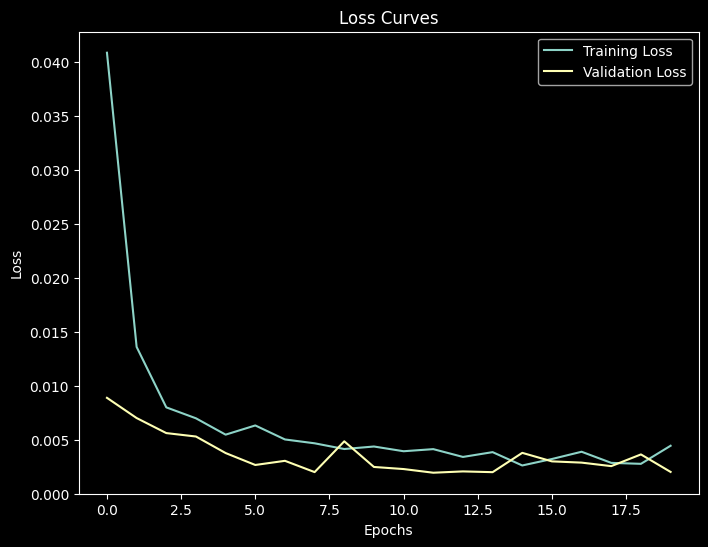

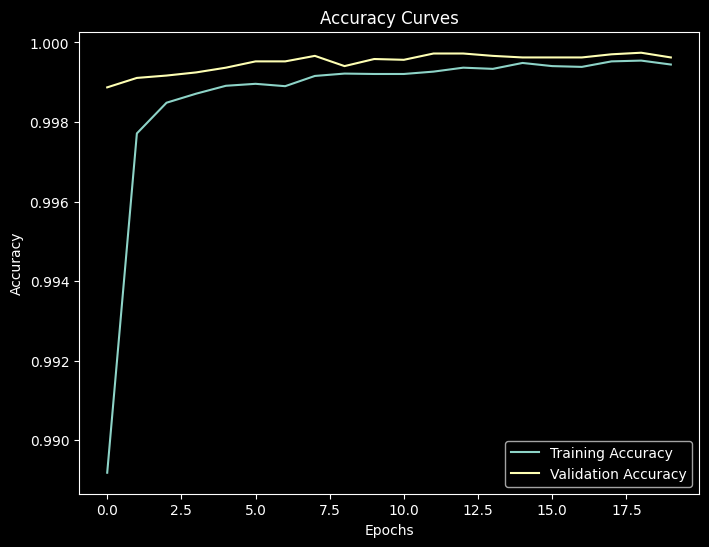

In [70]:
# Plotting loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
encoded_mapping = {'benign': 0, 'gafgyt attacks': 1, 'mirai attacks': 2}
class_names = list(encoded_mapping.keys())


### Confusion Matrix for validationset

   1/1580 [..............................] - ETA: 25s

1580/1580 [==============================] - 2s 1ms/step


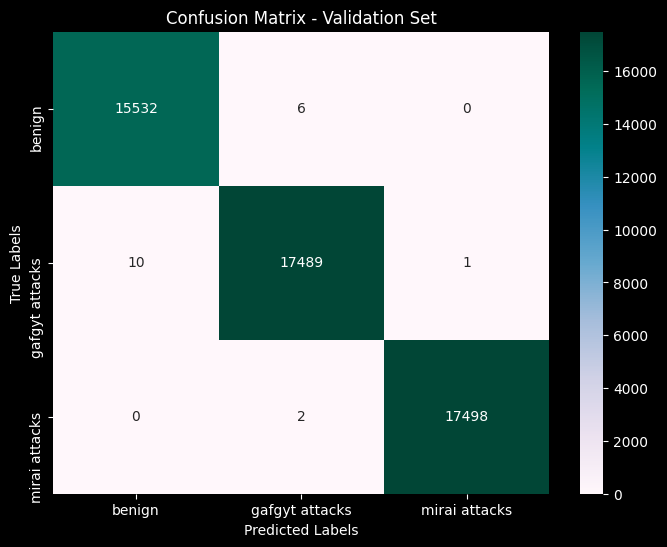

In [72]:
from sklearn.metrics import confusion_matrix

# Predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)

# Confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='PuBuGn', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Confusion matrix for test set

1580/1580 [==============================] - 2s 1ms/step


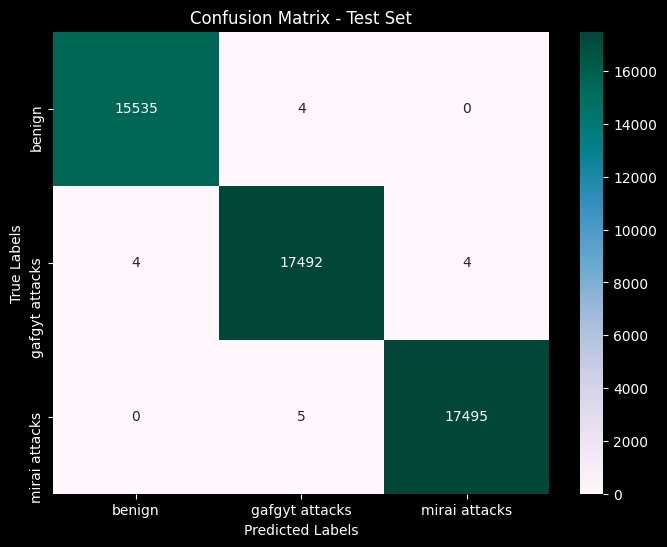

In [73]:

# Predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)

# Confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test_true, y_test_pred_classes)

# Plotting confusion matrix for test set with class names
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='PuBuGn', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## RandomForest Model

In [74]:
# Creating and fitting the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=100, max_depth=10, min_samples_leaf=5, max_features='sqrt')  
random_forest.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred_rf = random_forest.predict(X_val)

# Evaluating the model on the validation set
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy: {accuracy_val_rf:.2f}")

# Classification report for the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

# Predictions on the test set
y_test_pred_rf = random_forest.predict(X_test)

# Evaluating the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"\nTest Accuracy: {accuracy_test_rf:.2f}")

# Classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_rf))


Validation Accuracy: 1.00
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15538
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50538
   macro avg       1.00      1.00      1.00     50538
weighted avg       1.00      1.00      1.00     50538


Test Accuracy: 1.00
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15539
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50539
   macro avg       1.00      1.00      1.00     50539
weighted avg       1.00      1.00      1.00     50539



### Confusion matrix for validation set

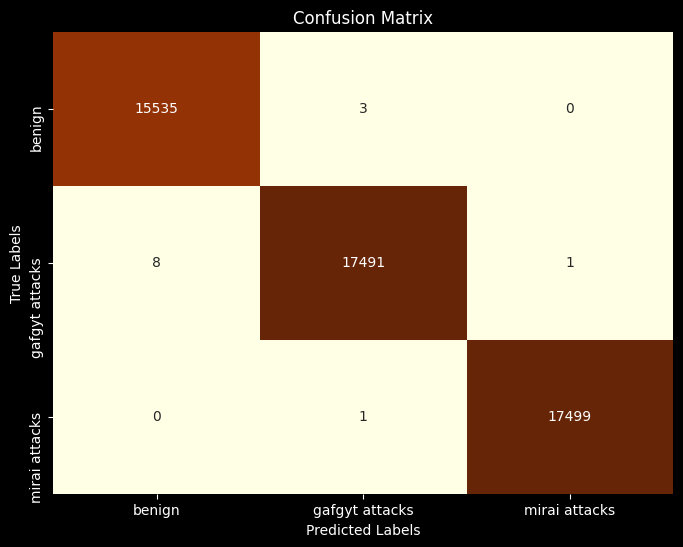

In [75]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Confusion matrix for Test set

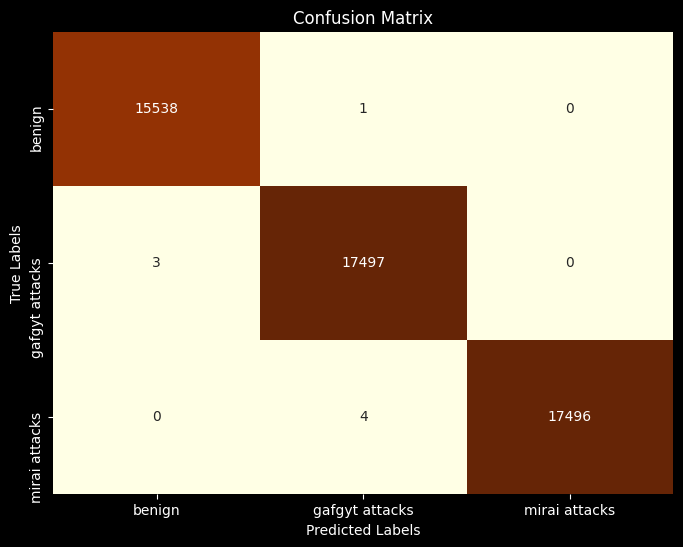

In [76]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## SVM classifier

In [77]:
svm_model = SVC(random_state = 42)
svm_model.fit(X_train, y_train)
y_val_pred = svm_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# You can also print a detailed classification report
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9991689421821204
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15538
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50538
   macro avg       1.00      1.00      1.00     50538
weighted avg       1.00      1.00      1.00     50538



In [78]:
y_test_pred_svm = svm_model.predict(X_test)

test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("Test Accuracy:", test_accuracy_svm)
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred_svm))

Test Accuracy: 0.9991491719266309
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15539
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50539
   macro avg       1.00      1.00      1.00     50539
weighted avg       1.00      1.00      1.00     50539



### Confusion Matrix on Validation set

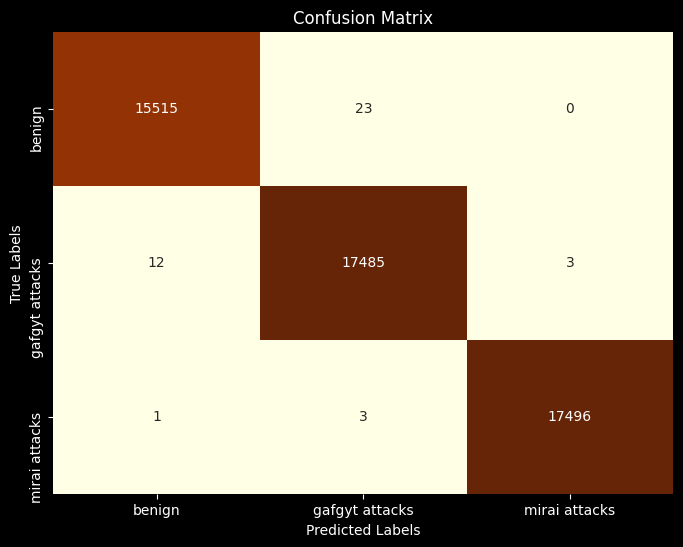

In [79]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Confusion Matrix on Test set

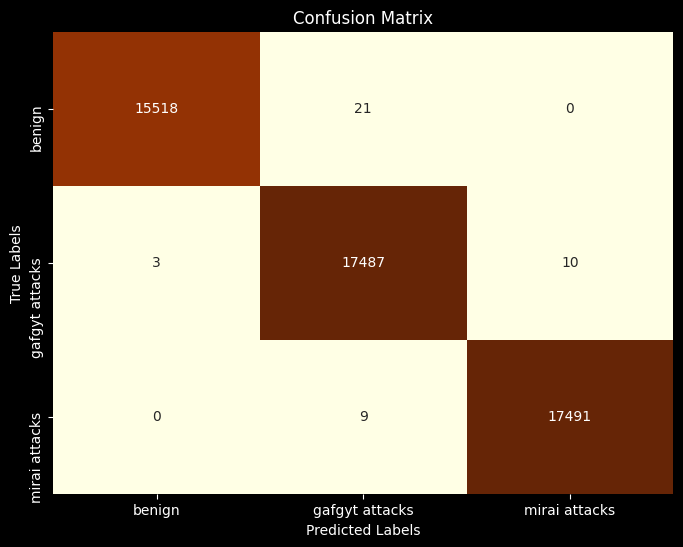

In [80]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Gaussian NAIVE BIAS classifier

In [81]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_val_pred = nb.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# You can also print a detailed classification report
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8663184138667933
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15538
           1       0.72      1.00      0.84     17500
           2       1.00      0.62      0.76     17500

    accuracy                           0.87     50538
   macro avg       0.91      0.87      0.87     50538
weighted avg       0.90      0.87      0.86     50538



In [82]:
y_test_pred_nb = nb.predict(X_test)

# Evaluate the model on the test set
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
print("Test Accuracy (Naive Bayes):", test_accuracy_nb)

# Print a detailed classification report for the test set
print("Classification Report (Test Set - Naive Bayes):\n", classification_report(y_test, y_test_pred_nb))

Test Accuracy (Naive Bayes): 0.8690911968974455
Classification Report (Test Set - Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15539
           1       0.73      1.00      0.84     17500
           2       1.00      0.63      0.77     17500

    accuracy                           0.87     50539
   macro avg       0.91      0.87      0.87     50539
weighted avg       0.90      0.87      0.86     50539



### Confusion Matrix on Validation set

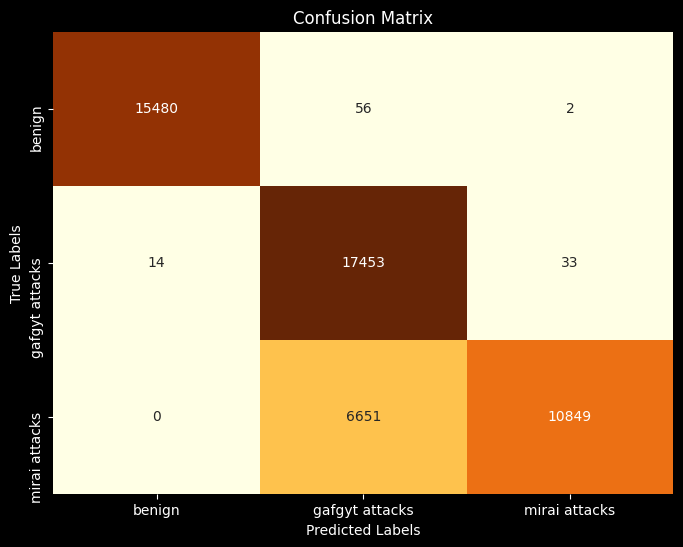

In [83]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Confusion Matrix on Test Set

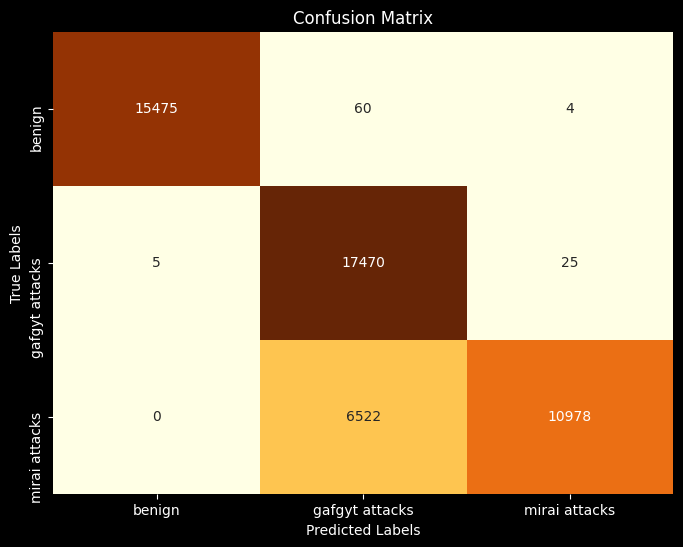

In [84]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## KNN 

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(X_train, y_train)

y_val_pred_knn = knn.predict(X_val)

val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print("Validation Accuracy (KNN):", val_accuracy_knn)
print("Classification Report (Validation Set - KNN):\n", classification_report(y_val, y_val_pred_knn))

Validation Accuracy (KNN): 0.9995646840001583
Classification Report (Validation Set - KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15538
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50538
   macro avg       1.00      1.00      1.00     50538
weighted avg       1.00      1.00      1.00     50538



In [86]:
y_test_pred_knn = knn.predict(X_test)

# Evaluate the model on the test set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("Test Accuracy (KNN):", test_accuracy_knn)

# Print a detailed classification report for the test set
print("Classification Report (Test Set - KNN):\n", classification_report(y_test, y_test_pred_knn))

Test Accuracy (KNN): 0.9996240527117671
Classification Report (Test Set - KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15539
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50539
   macro avg       1.00      1.00      1.00     50539
weighted avg       1.00      1.00      1.00     50539



### Confusion matrix on validation set

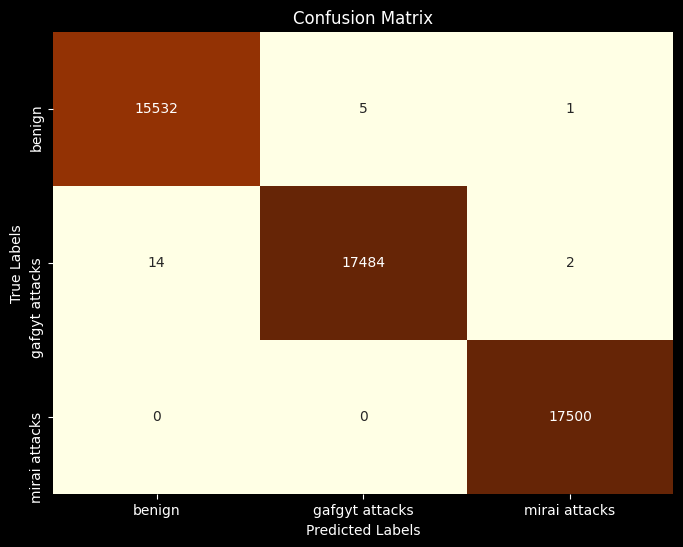

In [87]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Confusion matrix on Test set

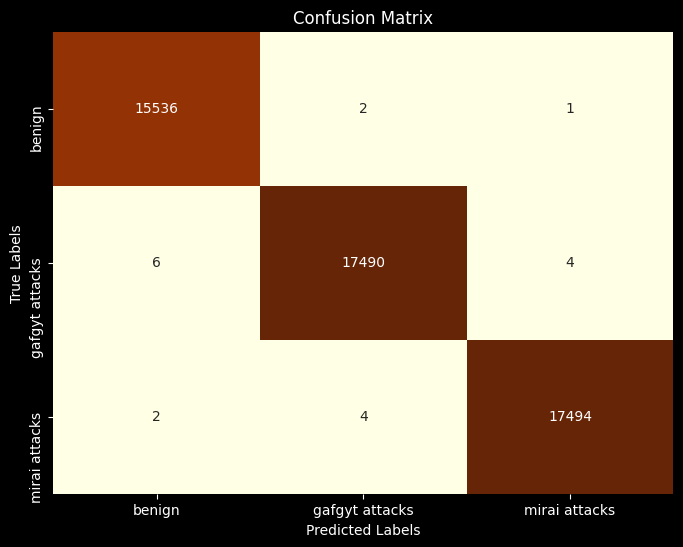

In [88]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## DecisionTree model 

In [89]:
# Creating and fitting the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = decision_tree.predict(X_val)

# Evaluating the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val:.2f}")

# Classification report for the validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Evaluating the model on the test set
accuracy_test_DT = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {accuracy_test_DT:.2f}")

# Classification report for the test set
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 1.00
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15538
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50538
   macro avg       1.00      1.00      1.00     50538
weighted avg       1.00      1.00      1.00     50538


Test Accuracy: 1.00
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15539
           1       1.00      1.00      1.00     17500
           2       1.00      1.00      1.00     17500

    accuracy                           1.00     50539
   macro avg       1.00      1.00      1.00     50539
weighted avg       1.00      1.00      1.00     50539



### Confusion matrix on validation set 

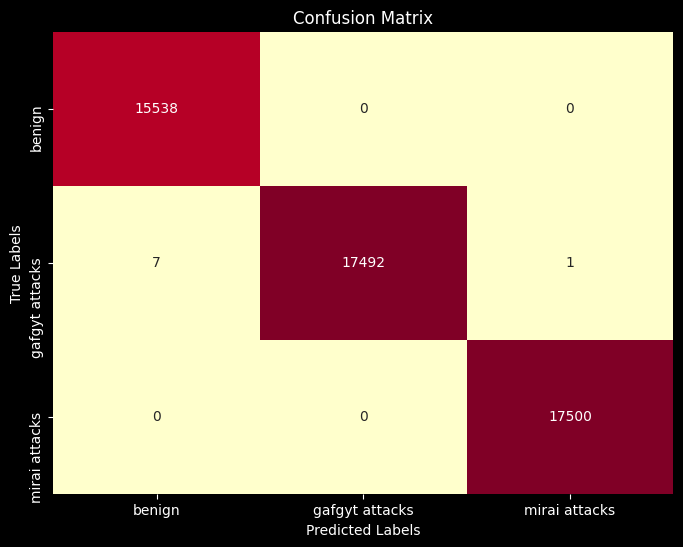

In [90]:


# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Confusion matrix on test set

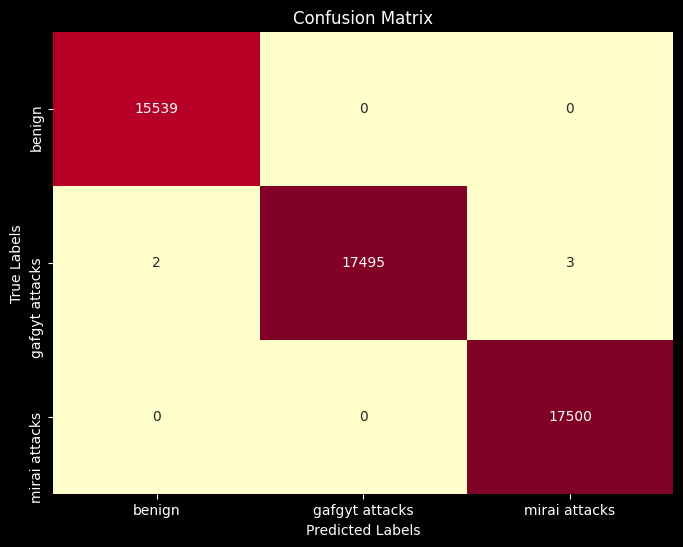

In [91]:


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Plotting all accuracies togther 

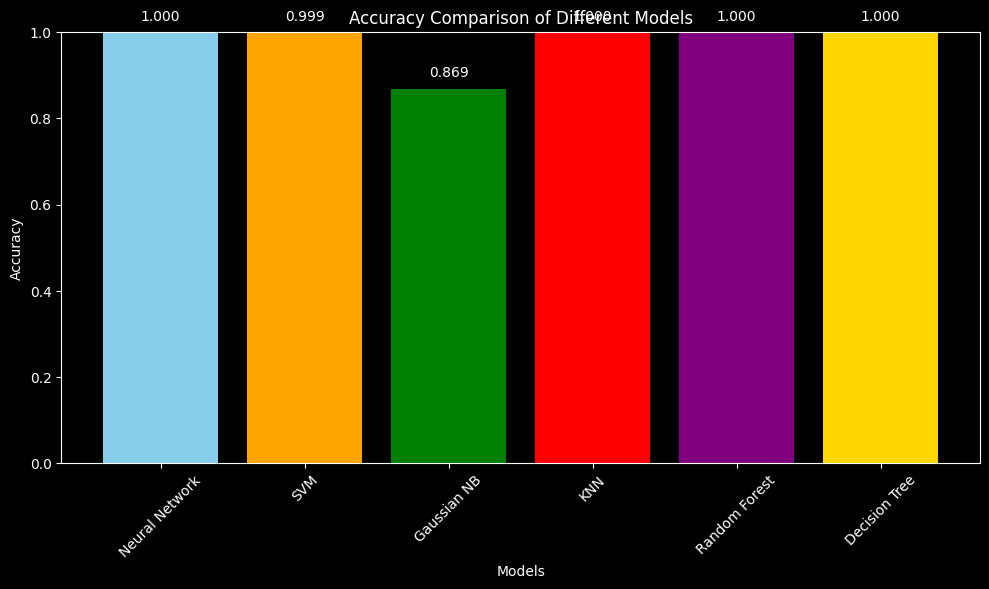

In [92]:
import matplotlib.pyplot as plt

# List of model names and their accuracies
model_names = ['Neural Network', 'SVM', 'Gaussian NB', 'KNN', 'Random Forest', 'Decision Tree']
accuracies = [acc_NN, test_accuracy_svm, test_accuracy_nb, test_accuracy_knn, accuracy_test_rf, accuracy_test_DT]

# Define different colors for bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'gold']

# Plotting the accuracies with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  

# Add accuracy values as text on each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Now after we Found out that there is an attack or not now we detect the type of attack for MIRAI & GAFGYT

In [93]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)

In [94]:
df

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      590.000000            0.000000   
2               1.942585      590.000000            0.000000   
3               1.000000       60.000000            0.000000   
4               1.979600       66.061831           35.996177   
...                  ...             ...                 ...   
828255         87.531184      215.656970        52663.369508   
828256         88.530533      219.478736        53346.970597   
828257         89.031218      223.236084        53990.571728   
828258         90.030923      221.422973        53683.560352   
828259         91.030328      219.649685        53376.932506   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
0               1.000000       60.000000        0.000000e+00   
1               1.000000      590.000000        0.000000e+00   
2               1.965145      590.000000        1.160000e-10   
3               1.000000       60.000000        0.000000e+00   
4               1.987709       66.037100        3.599862e+01   
...                  ...             ...                 ...   
828255        124.827316      255.099568        5.830603e+04   
828256        125.826759      257.475060        5.854704e+04   
828257        126.400478      259.820976        5.877397e+04   
828258        127.400227      258.252525        5.862359e+04   
828259        128.399722      256.708499        5.847074e+04   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
0               1.000000       60.000000            0.000000   
1               1.000000      590.000000            0.000000   
2               1.988244      590.000000            0.000000   
3               1.000000       60.000000            0.000000   
4               1.995886       66.012367           35.999847   
...                  ...             ...                 ...   
828255        383.945706      306.000433        60984.181302   
828256        384.945135      306.644680        60985.116061   
828257        385.509931      307.286311        60985.221966   
828258        386.509677      306.646518        60985.240299   
828259        387.509166      306.010026        60984.446191   

        MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  HpHp_L0.1_pcc  \
0                 1.000000  ...                   0.0            0.0   
1                 1.000000  ...                   0.0            0.0   
2                 1.998818  ...                   0.0            0.0   
3                 1.000000  ...                   0.0            0.0   
4                 1.999588  ...                   0.0            0.0   
...                    ...  ...                   ...            ...   
828255         3470.002907  ...                   0.0            0.0   
828256         3471.002391  ...                   0.0            0.0   
828257         3471.609774  ...                   0.0            0.0   
828258         3472.609545  ...                   0.0            0.0   
828259         3473.609085  ...                   0.0            0.0   

        HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0                1.000000        60.000000        0.000000   
1                6.302352       416.121686      113.526005   
2                7.301607       439.935392      121.229684   
3                1.000000        60.000000        0.000000   
4                1.000000        72.000000        0.000000   
...                   ...              ...             ...   
828255           1.000000        60.000000        0.000000   
828256       13308.390626       554.000000        0.000047   
828257       13309.240083       554.000000        0.000047   
828258           1.000000        60.000000        0.000000   
828259           1.000000        60.000000        0.000000   

        HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0                

## MIRAI DataFrame 

In [95]:
mirai_df = df[df['type'].str.contains('mirai')]

In [96]:
mirai_df

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
62154           1.000000       60.000000        0.000000e+00   
62155           1.999987       60.000000        0.000000e+00   
62156           2.999979       60.000000        0.000000e+00   
62157           3.999969       60.000000        9.094947e-13   
62158           4.999942      158.801143        3.904610e+04   
...                  ...             ...                 ...   
828255         87.531184      215.656970        5.266337e+04   
828256         88.530533      219.478736        5.334697e+04   
828257         89.031218      223.236084        5.399057e+04   
828258         90.030923      221.422973        5.368356e+04   
828259         91.030328      219.649685        5.337693e+04   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
62154           1.000000       60.000000        0.000000e+00   
62155           1.999992       60.000000        0.000000e+00   
62156           2.999987       60.000000        0.000000e+00   
62157           3.999981       60.000000        4.547474e-13   
62158           4.999965      158.800686        3.904596e+04   
...                  ...             ...                 ...   
828255        124.827316      255.099568        5.830603e+04   
828256        125.826759      257.475060        5.854704e+04   
828257        126.400478      259.820976        5.877397e+04   
828258        127.400227      258.252525        5.862359e+04   
828259        128.399722      256.708499        5.847074e+04   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
62154           1.000000       60.000000        0.000000e+00   
62155           1.999997       60.000000        0.000000e+00   
62156           2.999996       60.000000        4.547474e-13   
62157           3.999994       60.000000        4.547474e-13   
62158           4.999988      158.800229        3.904583e+04   
...                  ...             ...                 ...   
828255        383.945706      306.000433        6.098418e+04   
828256        384.945135      306.644680        6.098512e+04   
828257        385.509931      307.286311        6.098522e+04   
828258        386.509677      306.646518        6.098524e+04   
828259        387.509166      306.010026        6.098445e+04   

        MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  HpHp_L0.1_pcc  \
62154             1.000000  ...                   0.0            0.0   
62155             2.000000  ...                   0.0            0.0   
62156             3.000000  ...                   0.0            0.0   
62157             3.999999  ...                   0.0            0.0   
62158             4.999999  ...                   0.0            0.0   
...                    ...  ...                   ...            ...   
828255         3470.002907  ...                   0.0            0.0   
828256         3471.002391  ...                   0.0            0.0   
828257         3471.609774  ...                   0.0            0.0   
828258         3472.609545  ...                   0.0            0.0   
828259         3473.609085  ...                   0.0            0.0   

        HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
62154            1.000000             60.0        0.000000   
62155            1.000000             60.0        0.000000   
62156            1.000000             60.0        0.000000   
62157            1.000000             60.0        0.000000   
62158            1.000000            554.0        0.000000   
...                   ...              ...             ...   
828255           1.000000             60.0        0.000000   
828256       13308.390626            554.0        0.000047   
828257       13309.240083            554.0        0.000047   
828258           1.000000             60.0        0.000000   
828259           1.000000             60.0        0.000000   

        HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
62154            

## GAFGYT DataFrame

In [97]:
gafgyt_df = df[df['type'].str.contains('gafgyt')]

In [98]:
gafgyt_df = gafgyt_df[gafgyt_df['type'] != 'gafgyt_tcp']
gafgyt_df


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
218402          1.000000       98.000000        0.000000e+00   
218403          1.029000       98.000000        1.818989e-12   
218404          1.504156       76.725612        2.281808e+02   
218405          2.460087       75.617679        1.372200e+02   
218406          3.460055       75.150149        9.809937e+01   
...                  ...             ...                 ...   
548493          1.000000       60.000000        0.000000e+00   
548494          1.000000       60.000000        0.000000e+00   
548495          1.000000       60.000000        0.000000e+00   
548496          1.000000       60.000000        0.000000e+00   
548497          1.000000       60.000000        0.000000e+00   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
218402          1.000000       98.000000            0.000000   
218403          1.119520       98.000000            0.000000   
218404          1.729662       79.499272          249.746357   
218405          2.699075       77.461807          164.269331   
218406          3.699054       76.525944          122.224798   
...                  ...             ...                 ...   
548493          1.000000       60.000000            0.000000   
548494          1.000000       60.000000            0.000000   
548495          1.000000       60.000000            0.000000   
548496          1.000000       60.000000            0.000000   
548497          1.000000       60.000000            0.000000   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
218402          1.000000       98.000000        0.000000e+00   
218403          1.492583       98.000000        3.637979e-12   
218404          2.294102       84.051188        2.517926e+02   
218405          3.280499       80.987267        1.964467e+02   
218406          4.280490       79.354915        1.592943e+02   
...                  ...             ...                 ...   
548493          1.000000       60.000000        0.000000e+00   
548494          1.000000       60.000000        0.000000e+00   
548495          1.000000       60.000000        0.000000e+00   
548496          1.000000       60.000000        0.000000e+00   
548497          1.000000       60.000000        0.000000e+00   

        MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  HpHp_L0.1_pcc  \
218402            1.000000  ...                   0.0            0.0   
218403            1.931640  ...                   0.0            0.0   
218404            2.904273  ...                   0.0            0.0   
218405            3.902546  ...                   0.0            0.0   
218406            4.902545  ...                   0.0            0.0   
...                    ...  ...                   ...            ...   
548493            1.000000  ...                   0.0            0.0   
548494            1.000000  ...                   0.0            0.0   
548495            1.000000  ...                   0.0            0.0   
548496            1.000000  ...                   0.0            0.0   
548497            1.000000  ...                   0.0            0.0   

        HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
218402           1.000000             98.0        0.000000   
218403           1.992944             98.0        0.000001   
218404           1.000000             66.0        0.000000   
218405           1.000000             74.0        0.000000   
218406           1.000000             74.0        0.000000   
...                   ...              ...             ...   
548493           1.000000             60.0        0.000000   
548494           1.000000             60.0        0.000000   
548495           1.000000             60.0        0.000000   
548496           1.000000             60.0        0.000000   
548497           1.000000             60.0        0.000000   

        HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
218402           

# Now we detect the type of each attack 

## First For MIRAI attack

### MIRAI attack distribution

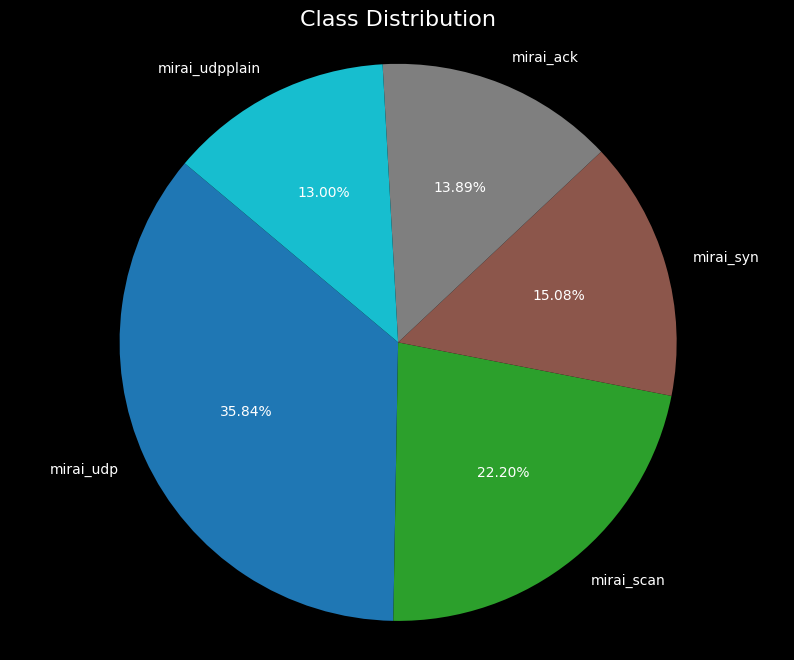

In [99]:
class_counts = mirai_df['type'].value_counts()

num_slices = len(class_counts)
color_palette = plt.cm.get_cmap('tab10', num_slices)  
colors = color_palette(range(num_slices))

plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Class Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [100]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'type' column
mirai_df['type'] = label_encoder.fit_transform(mirai_df['type'])

# Check the mapping of encoded values
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded mapping:", encoded_mapping)

Encoded mapping: {'mirai_ack': 0, 'mirai_scan': 1, 'mirai_syn': 2, 'mirai_udp': 3, 'mirai_udpplain': 4}


c:\Users\aa\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = mirai_df.drop('type', axis=1)  
y = mirai_df['type']  



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X
X = scaler.fit_transform(X)


# Splitting the data into train (50%) and rest (50%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Splitting the rest into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


Top 52 features and their importances:
Feature: 29 Importance: 0.08254047355078714
Feature: 14 Importance: 0.07382785418137645
Feature: 26 Importance: 0.06603114041838483
Feature: 11 Importance: 0.054950417994491366
Feature: 13 Importance: 0.05183463672636365
Feature: 10 Importance: 0.04590770509109513
Feature: 25 Importance: 0.043464168886572875
Feature: 28 Importance: 0.04222169418806266
Feature: 8 Importance: 0.02469251817650156
Feature: 24 Importance: 0.02444184943876547
Feature: 23 Importance: 0.022655123879653034
Feature: 22 Importance: 0.02209385363445455
Feature: 9 Importance: 0.021423490109643905
Feature: 12 Importance: 0.01848734050045131
Feature: 5 Importance: 0.017954439787171327
Feature: 27 Importance: 0.016714507638879696
Feature: 54 Importance: 0.015324570330208663
Feature: 20 Importance: 0.015054671304331474
Feature: 7 Importance: 0.014971481331794054
Feature: 101 Importance: 0.013018711100134747
Feature: 2 Importance: 0.011872275785275858
Feature: 78 Importance: 0.0116

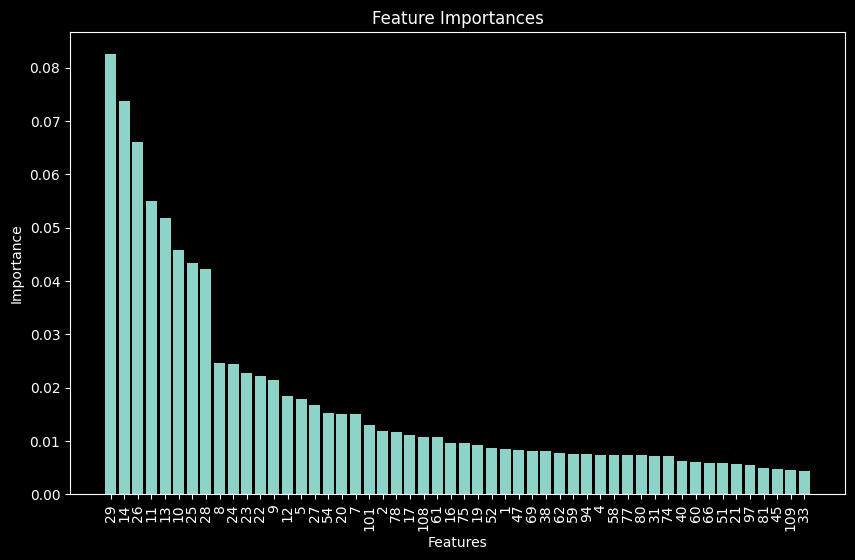

In [102]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Initialize the ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Fit the model to your training data
clf.fit(X_train_df, y_train)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top k features
k = 52 
top_k_features = X_train_df.columns[indices][:k]

# Print the top k features and their importances
print("Top", k, "features and their importances:")
for i in range(k):
    feature_name = top_k_features[i]
    print("Feature:", feature_name, "Importance:", importances[indices[i]])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(k), importances[indices][:k])
plt.xticks(range(k), top_k_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [103]:
top_k_features

Int64Index([ 29,  14,  26,  11,  13,  10,  25,  28,   8,  24,  23,  22,   9,
             12,   5,  27,  54,  20,   7, 101,   2,  78,  17, 108,  61,  16,
             75,  19,  52,   1,  47,  69,  38,  62,  59,  94,   4,  58,  77,
             80,  31,  74,  40,  60,  66,  51,  21,  97,  81,  45, 109,  33],
           dtype='int64')

In [104]:

feature_indices = [115, 29,  14,  26,  11,  13,  10,  25,  28,   8,  24,  23,  22,   9,
             12,   5,  27,  54,  20,   7, 101,   2,  78,  17, 108,  61,  16,
             75,  19,  52,   1,  47,  69,  38,  62,  59,  94,   4,  58,  77,
             80,  31,  74,  40,  60,  66,  51,  21,  97,  81,  45, 109,  33]

# Select columns using the provided feature indices
selected_mirai_features = mirai_df.iloc[:, feature_indices]


In [105]:
selected_mirai_features['type'] .unique()

array([3, 0, 1, 2, 4])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = selected_mirai_features.drop('type', axis=1)  
y = selected_mirai_features['type']  



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X
X = scaler.fit_transform(X)


# Splitting the data into train (60%) and rest (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Splitting the rest into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [107]:
selected_mirai_features['type'] .unique()

array([3, 0, 1, 2, 4])

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



# Convert target labels to categorical
num_classes = len(selected_mirai_features['type'] .unique())
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               13568     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 


 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 85        
          

In [109]:
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/20
1704/1704 [==============================] - 12s 7ms/step - loss: 0.1887 - accuracy: 0.9300 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 2/20
1704/1704 [==============================] - 11s 6ms/step - loss: 0.0662 - accuracy: 0.9775 - val_loss: 0.0190 - val_accuracy: 0.9943
Epoch 3/20
1704/1704 [==============================] - 11s 7ms/step - loss: 0.0486 - accuracy: 0.9830 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoch 4/20
1704/1704 [==============================] - 11s 6ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.0508 - val_accuracy: 0.9837
Epoch 5/20
1704/1704 [==============================] - 11s 6ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.0170 - val_accuracy: 0.9930
Epoch 6/20
1704/1704 [==============================] - 11s 7ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0140 - val_accuracy: 0.9961
Epoch 7/20
1704/1704 [==============================] - 11s 7ms/step - loss: 0.0278 - accuracy: 0.9903 - val_loss: 0.0119 - val_ac

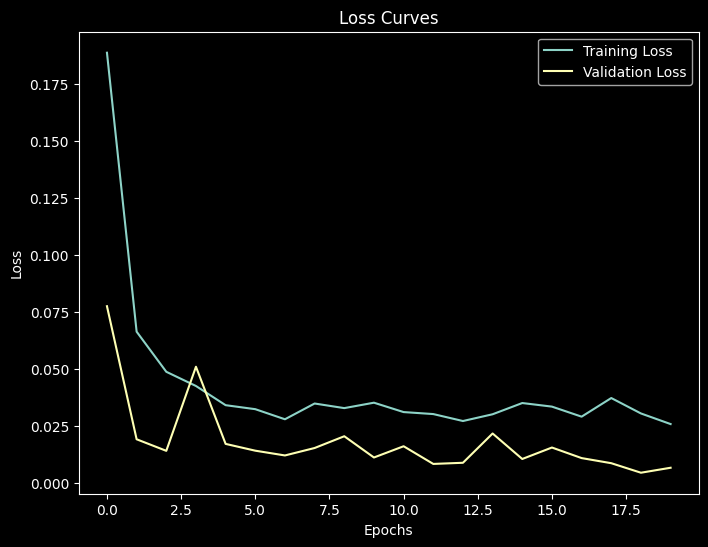

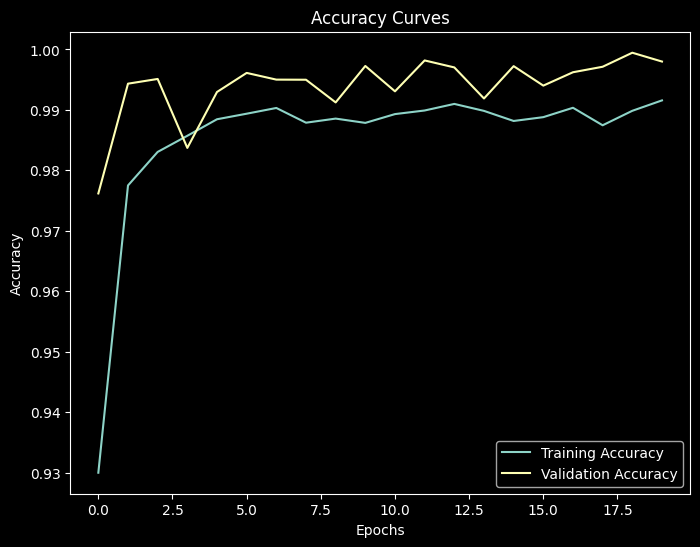

In [110]:
# Plotting loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [111]:
encoded_mapping = {'mirai_ack': 0, 'mirai_scan': 1, 'mirai_syn': 2, 'mirai_udp': 3, 'mirai_udpplain': 4}
class_names = list(encoded_mapping.keys())


3407/3407 [==============================] - 5s 1ms/step


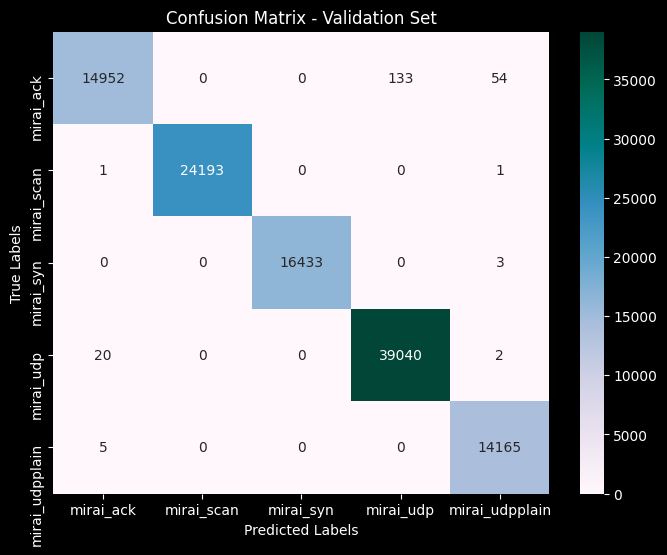

In [112]:

# Predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)

# Confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='PuBuGn', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3407/3407 [==============================] - 5s 1ms/step


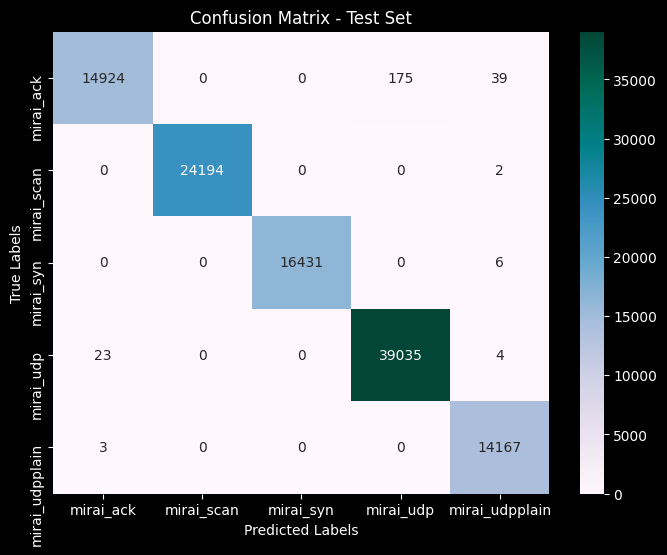

In [113]:

# Predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)

# Confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test_true, y_test_pred_classes)

# Plotting confusion matrix for test set with class names
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='PuBuGn', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Second we go through gafgyt

### GAFGYT Attacks distribution

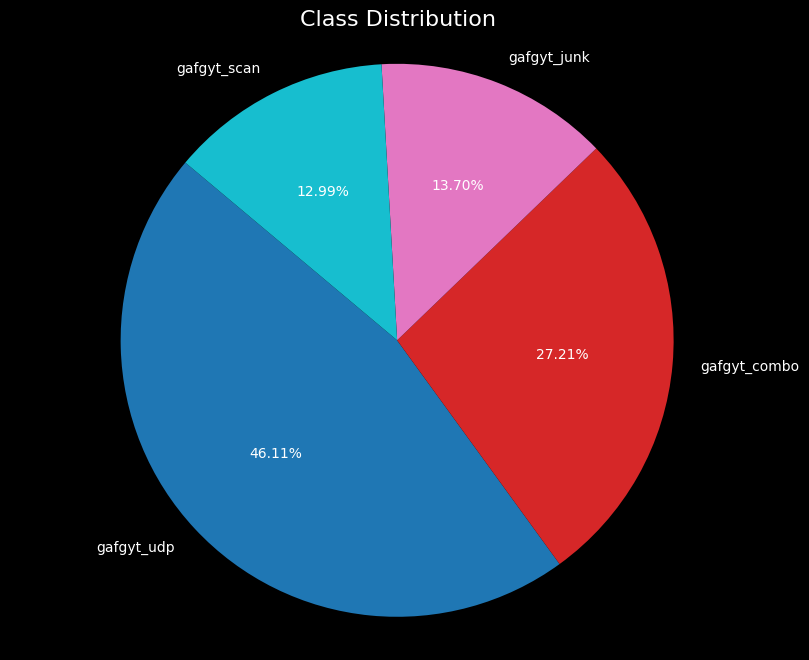

In [114]:
class_counts = gafgyt_df['type'].value_counts()

num_slices = len(class_counts)
color_palette = plt.cm.get_cmap('tab10', num_slices)  
colors = color_palette(range(num_slices))

plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Class Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [115]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'type' column
gafgyt_df['type'] = label_encoder.fit_transform(gafgyt_df['type'])

# Check the mapping of encoded values
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded mapping:", encoded_mapping)

Encoded mapping: {'gafgyt_combo': 0, 'gafgyt_junk': 1, 'gafgyt_scan': 2, 'gafgyt_udp': 3}


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = gafgyt_df.drop('type', axis=1)  
y = gafgyt_df['type']  



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X
X = scaler.fit_transform(X)


# Splitting the data into train (50%) and rest (50%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Splitting the rest into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


Top 52 features and their importances:
Feature: 69 Importance: 0.05906659921277316
Feature: 78 Importance: 0.049987444735459234
Feature: 12 Importance: 0.04839002279203405
Feature: 66 Importance: 0.047990915158833976
Feature: 75 Importance: 0.046078677359428236
Feature: 72 Importance: 0.04422392042418678
Feature: 71 Importance: 0.041624280840694285
Feature: 44 Importance: 0.03469946275772492
Feature: 27 Importance: 0.03412896092667612
Feature: 15 Importance: 0.03282768522822613
Feature: 13 Importance: 0.03189469684971726
Feature: 6 Importance: 0.031190165387117497
Feature: 28 Importance: 0.027354092617507295
Feature: 24 Importance: 0.02619872507241004
Feature: 25 Importance: 0.025029371782619006
Feature: 9 Importance: 0.024031530423614587
Feature: 14 Importance: 0.023308789843173007
Feature: 37 Importance: 0.019591728805904252
Feature: 68 Importance: 0.019247092443890987
Feature: 29 Importance: 0.01923156688186375
Feature: 18 Importance: 0.018885521300287183
Feature: 0 Importance: 0.01

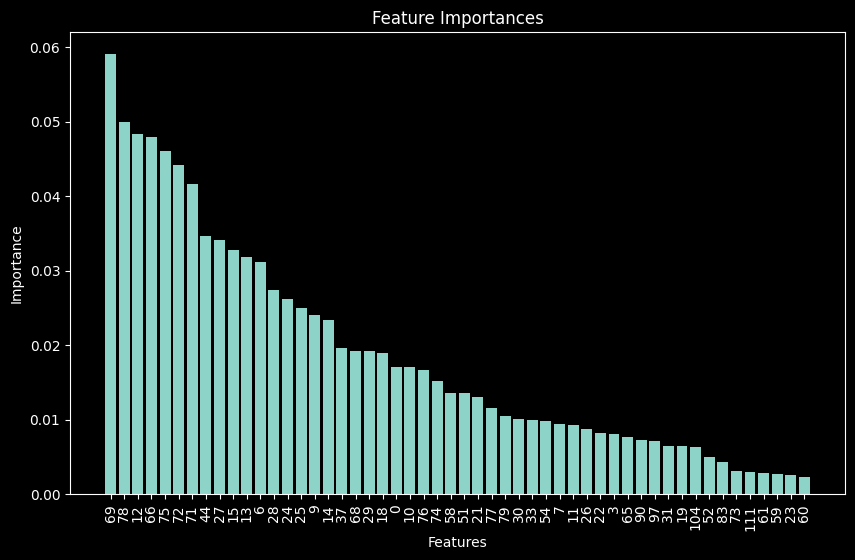

In [117]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Initialize the ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Fit the model to your training data
clf.fit(X_train_df, y_train)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top k features
k = 52 
top_k_features = X_train_df.columns[indices][:k]

# Print the top k features and their importances
print("Top", k, "features and their importances:")
for i in range(k):
    feature_name = top_k_features[i]
    print("Feature:", feature_name, "Importance:", importances[indices[i]])

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(k), importances[indices][:k])
plt.xticks(range(k), top_k_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [118]:
top_k_features

Int64Index([ 69,  78,  12,  66,  75,  72,  71,  44,  27,  15,  13,   6,  28,
             24,  25,   9,  14,  37,  68,  29,  18,   0,  10,  76,  74,  58,
             51,  21,  77,  79,  30,  33,  54,   7,  11,  26,  22,   3,  65,
             90,  97,  31,  19, 104,  52,  83,  73, 111,  61,  59,  23,  60],
           dtype='int64')

In [119]:

feature_indices = [115, 69,  78,  12,  66,  75,  72,  71,  44,  27,  15,  13,   6,  28,
             24,  25,   9,  14,  37,  68,  29,  18,   0,  10,  76,  74,  58,
             51,  21,  77,  79,  30,  33,  54,   7,  11,  26,  22,   3,  65,
             90,  97,  31,  19, 104,  52,  83,  73, 111,  61,  59,  23,  60]

# Select columns using the provided feature indices
selected_gafgyt_features = gafgyt_df.iloc[:, feature_indices]


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = selected_gafgyt_features.drop('type', axis=1)  
y = selected_gafgyt_features['type']  



# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform X
X = scaler.fit_transform(X)


# Splitting the data into train (60%) and rest (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Splitting the rest into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



# Convert target labels to categorical
num_classes = len(selected_gafgyt_features['type'] .unique())
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),    
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               13568     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)               

In [122]:
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_val, y_val_cat))

Epoch 1/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.2259 - accuracy: 0.8628 - val_loss: 0.2055 - val_accuracy: 0.8617
Epoch 2/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.1892 - accuracy: 0.8756 - val_loss: 0.1741 - val_accuracy: 0.8847
Epoch 3/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.1466 - accuracy: 0.9195 - val_loss: 0.0771 - val_accuracy: 0.9625
Epoch 4/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.0789 - accuracy: 0.9630 - val_loss: 0.0564 - val_accuracy: 0.9597
Epoch 5/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.0685 - accuracy: 0.9683 - val_loss: 0.0462 - val_accuracy: 0.9779
Epoch 6/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.0650 - accuracy: 0.9700 - val_loss: 0.0367 - val_accuracy: 0.9845
Epoch 7/20
3525/3525 [==============================] - 24s 7ms/step - loss: 0.0635 - accuracy: 0.9718 - val_loss: 0.0528 - val_ac

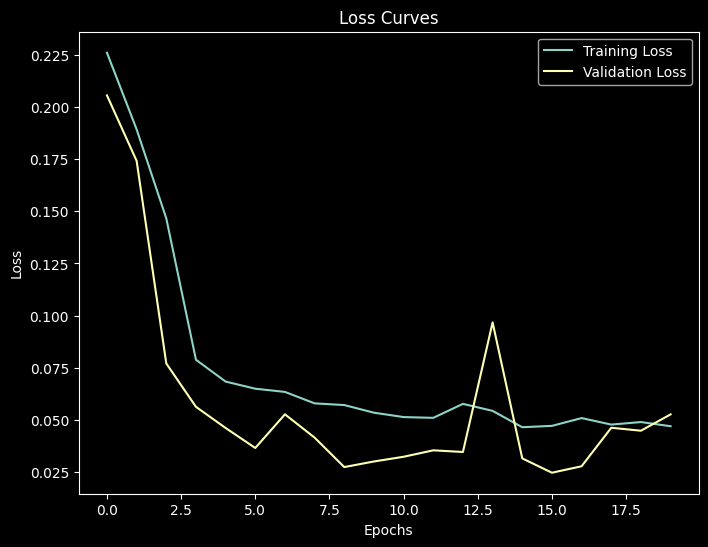

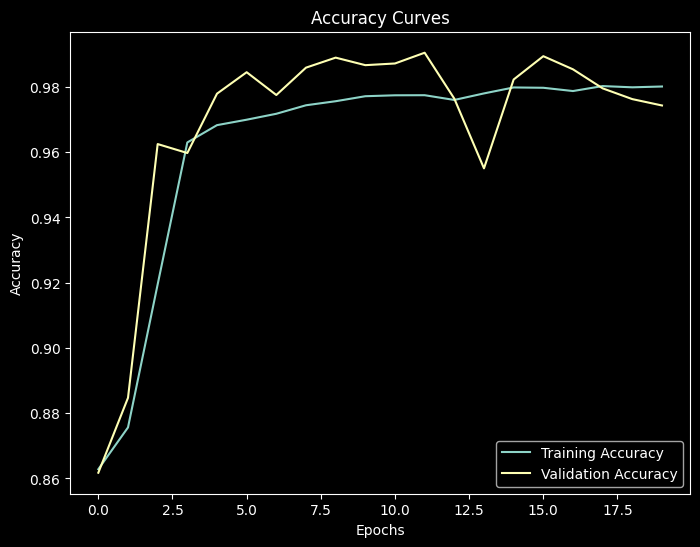

In [123]:
# Plotting loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [124]:
encoded_mapping = {'gafgyt_combo': 0, 'gafgyt_junk': 1, 'gafgyt_scan': 2, 'gafgyt_udp': 3}
class_names = list(encoded_mapping.keys())


1763/1763 [==============================] - 3s 1ms/step


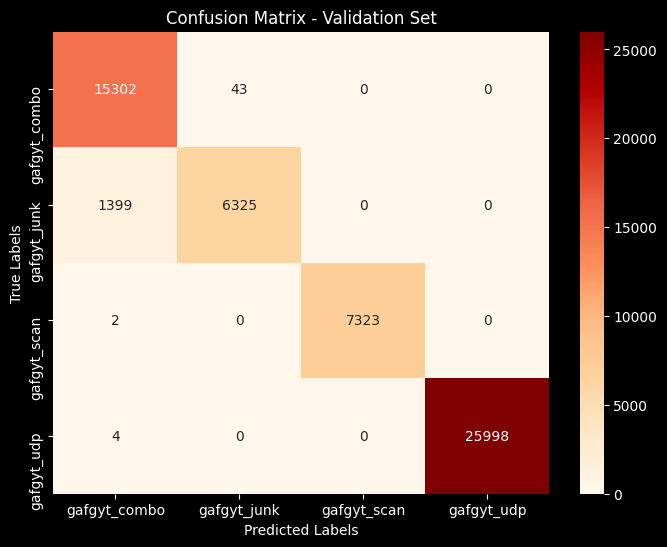

In [125]:

# Predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)

# Confusion matrix for validation set
val_conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1763/1763 [==============================] - 3s 1ms/step


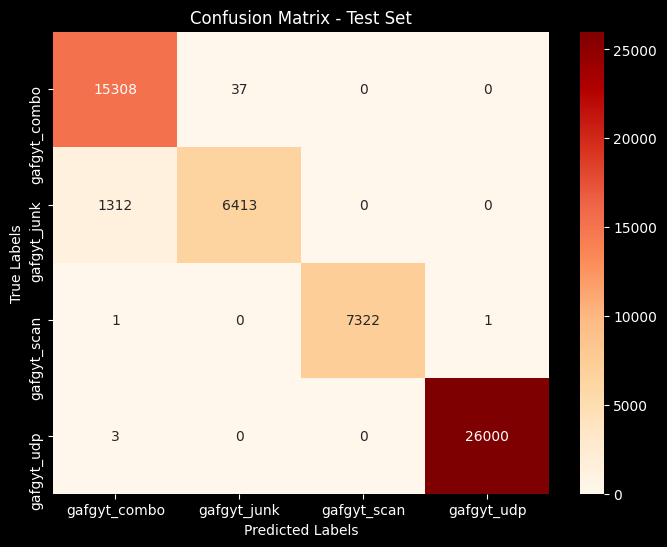

In [126]:

# Predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test_cat, axis=1)

# Confusion matrix for test set
test_conf_matrix = confusion_matrix(y_test_true, y_test_pred_classes)

# Plotting confusion matrix for test set with class names
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()